# Python Programming - Final Project
## Student : Alberto Bautista

# Part 1 - Highlight trends in the dataset using some plotting library.

### Import Libraries and load dataset

In [751]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

In [752]:
import pandas as pd
df = pd.read_csv("/Users/albertodavidbautistasanchez/Library/CloudStorage/OneDrive-Personal/Documentos/DataAnalytics/ProgrammingPython/FinalProject_ProgramingInPython/DataSetManagement/airbnb_listings.csv")
df.head()

id                          listing_url       scrape_id last_scraped  \
0   44077   https://www.airbnb.com/rooms/44077  20220911231053   2022-09-12   
1   85156   https://www.airbnb.com/rooms/85156  20220911231053   2022-09-12   
2  159889  https://www.airbnb.com/rooms/159889  20220911231053   2022-09-12   
3  162809  https://www.airbnb.com/rooms/162809  20220911231053   2022-09-11   
4  165828  https://www.airbnb.com/rooms/165828  20220911231053   2022-09-11   

        source                                          name  \
0  city scrape           cosy comfortable Irish cottage twin   
1  city scrape  Cosy Comfortable Irish Cottage  1 Double Bed   
2  city scrape                          Friendly Single Room   
3  city scrape            5.5 miles south of Dublin City :^)   
4  city scrape                Pádraig Pearse apt. Kilmainham   

                                         description  \
0  Our house was built in 1937 when there was ple...   
1  Our Cottage is a charming light filled cottage...   
2  Washing can be done at a cost of €5  per load....   
3  A nice place to relax after the bustle of the ...   
4  Don't just visit Dublin, experience Dublin in ...   

                               neighborhood_overview  \
0  I like our neighbourhood as there is no shorta...   
1  I love Dundrum and its surrounding areas ,<br ...   
2  Plenty of buses into the city and the area is ...   
3  Close to the sea, hill walks and the city - vi...   
4  Enjoy a walk along the grand canal, or just ob...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/525706/050a3a...   193005  ...   
1  https://a0.muscache.com/pictures/1749253/9ed2a...   193005  ...   
2  https://a0.muscache.com/pictures/3031697/a8259...   766611  ...   
3  https://a0.muscache.com/pictures/86694529/c07b...   777681  ...   
4  https://a0.muscache.com/pictures/34311419/b3f6...   790601  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.93                   4.66                4.82   
1                        4.88                   4.64                4.78   
2                        4.90                   4.63                4.74   
3                        4.97                   4.77                4.85   
4                        4.75                   4.34                4.55   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              2   
1     NaN                f                              2   
2     NaN                f                              3   
3     NaN                f                              2   
4     NaN                t                              5   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           5   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            2   
2                                            3   
3                                            2   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.85  
1                                           0              1.53  
2                                           0              2.78  
3                                           0              3.68  
4                                           0              0.48  

[5 rows x 75 columns]

In [753]:
df.shape

(7566, 75)

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [755]:
columnasToDelete = ["listing_url","scrape_id","last_scraped","source","picture_url","host_url","host_thumbnail_url",
                    "host_picture_url","neighbourhood_group_cleansed","bathrooms","license","calendar_updated"]
df.drop(columns=columnasToDelete, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   name                                          7566 non-null   object 
 2   description                                   7411 non-null   object 
 3   neighborhood_overview                         4194 non-null   object 
 4   host_id                                       7566 non-null   int64  
 5   host_name                                     7566 non-null   object 
 6   host_since                                    7566 non-null   object 
 7   host_location                                 6232 non-null   object 
 8   host_about                                    3556 non-null   object 
 9   host_response_time                            3932 non-null   o

# Data Transformation

In [757]:
df['amenities'] = df['amenities'].apply(ast.literal_eval).apply(len)
df['host_verifications'] = df['host_verifications'].apply(ast.literal_eval).apply(len)
#['email', 'phone']

In [758]:
df['bathrooms_text'] = df['bathrooms_text'].str.split().str[0]
df['bathrooms_text'] = pd.to_numeric(df['bathrooms_text'], errors='coerce').fillna(0.5)
df['bathrooms_text'] = df['bathrooms_text'].astype(float)

### Transformation of some columns

In [760]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df["host_response_rate"].fillna(0, inplace=True)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df["host_acceptance_rate"].fillna(0, inplace=True)
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

df["host_response_rate"]=df["host_response_rate"].astype(int)
df["host_acceptance_rate"]=df["host_acceptance_rate"].astype(int)

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

host_response_time_dic = {
    "nan" :1,
    "a few days or more" :2,
    "within a day":3,
    "within a few hours":4,
    "within an hour":5
}

df['host_response_time'] = df['host_response_time'].astype(str).replace(host_response_time_dic)

host_is_superhost_dic = {
    "t" :1,
    "f" :0    
}

df['host_is_superhost'] = df['host_is_superhost'].astype(str).replace(host_is_superhost_dic)
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(str).replace(host_is_superhost_dic)
df['host_identity_verified'] = df['host_identity_verified'].astype(str).replace(host_is_superhost_dic)
df['has_availability'] = df['has_availability'].astype(str).replace(host_is_superhost_dic)
df['instant_bookable'] = df['instant_bookable'].astype(str).replace(host_is_superhost_dic)
df['host_is_superhost']

# room_type_dic = {
#     "Shared room" :1,
#     "Private room" :2,
#     "Hotel room":3,
#     "Entire home/apt":4
# }
# df['room_type'] = df['room_type'].astype(str).replace(room_type_dic)
df['description'] = df['description'].apply(lambda x: len(str(x).split()))
df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            7566 non-null   int64         
 1   name                                          7566 non-null   object        
 2   description                                   7566 non-null   int64         
 3   neighborhood_overview                         4194 non-null   object        
 4   host_id                                       7566 non-null   int64         
 5   host_name                                     7566 non-null   object        
 6   host_since                                    7566 non-null   object        
 7   host_location                                 6232 non-null   object        
 8   host_about                                    3556 non-null   object

/var/folders/5h/fvq38v756lxc97gmqyw3df900000gn/T/ipykernel_88722/344681056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop(columns="id", axis=0 ,inplace=True)
/var/folders/5h/fvq38v756lxc97gmqyw3df900000gn/T/ipykernel_88722/344681056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop(columns="host_id", axis=0 ,inplace=True)


array([[<Axes: title={'center': 'description'}>,
        <Axes: title={'center': 'host_response_time'}>,
        <Axes: title={'center': 'host_response_rate'}>,
        <Axes: title={'center': 'host_acceptance_rate'}>,
        <Axes: title={'center': 'host_is_superhost'}>,
        <Axes: title={'center': 'host_listings_count'}>,
        <Axes: title={'center': 'host_total_listings_count'}>],
       [<Axes: title={'center': 'host_verifications'}>,
        <Axes: title={'center': 'host_has_profile_pic'}>,
        <Axes: title={'center': 'host_identity_verified'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms_text'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'amenities'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
     

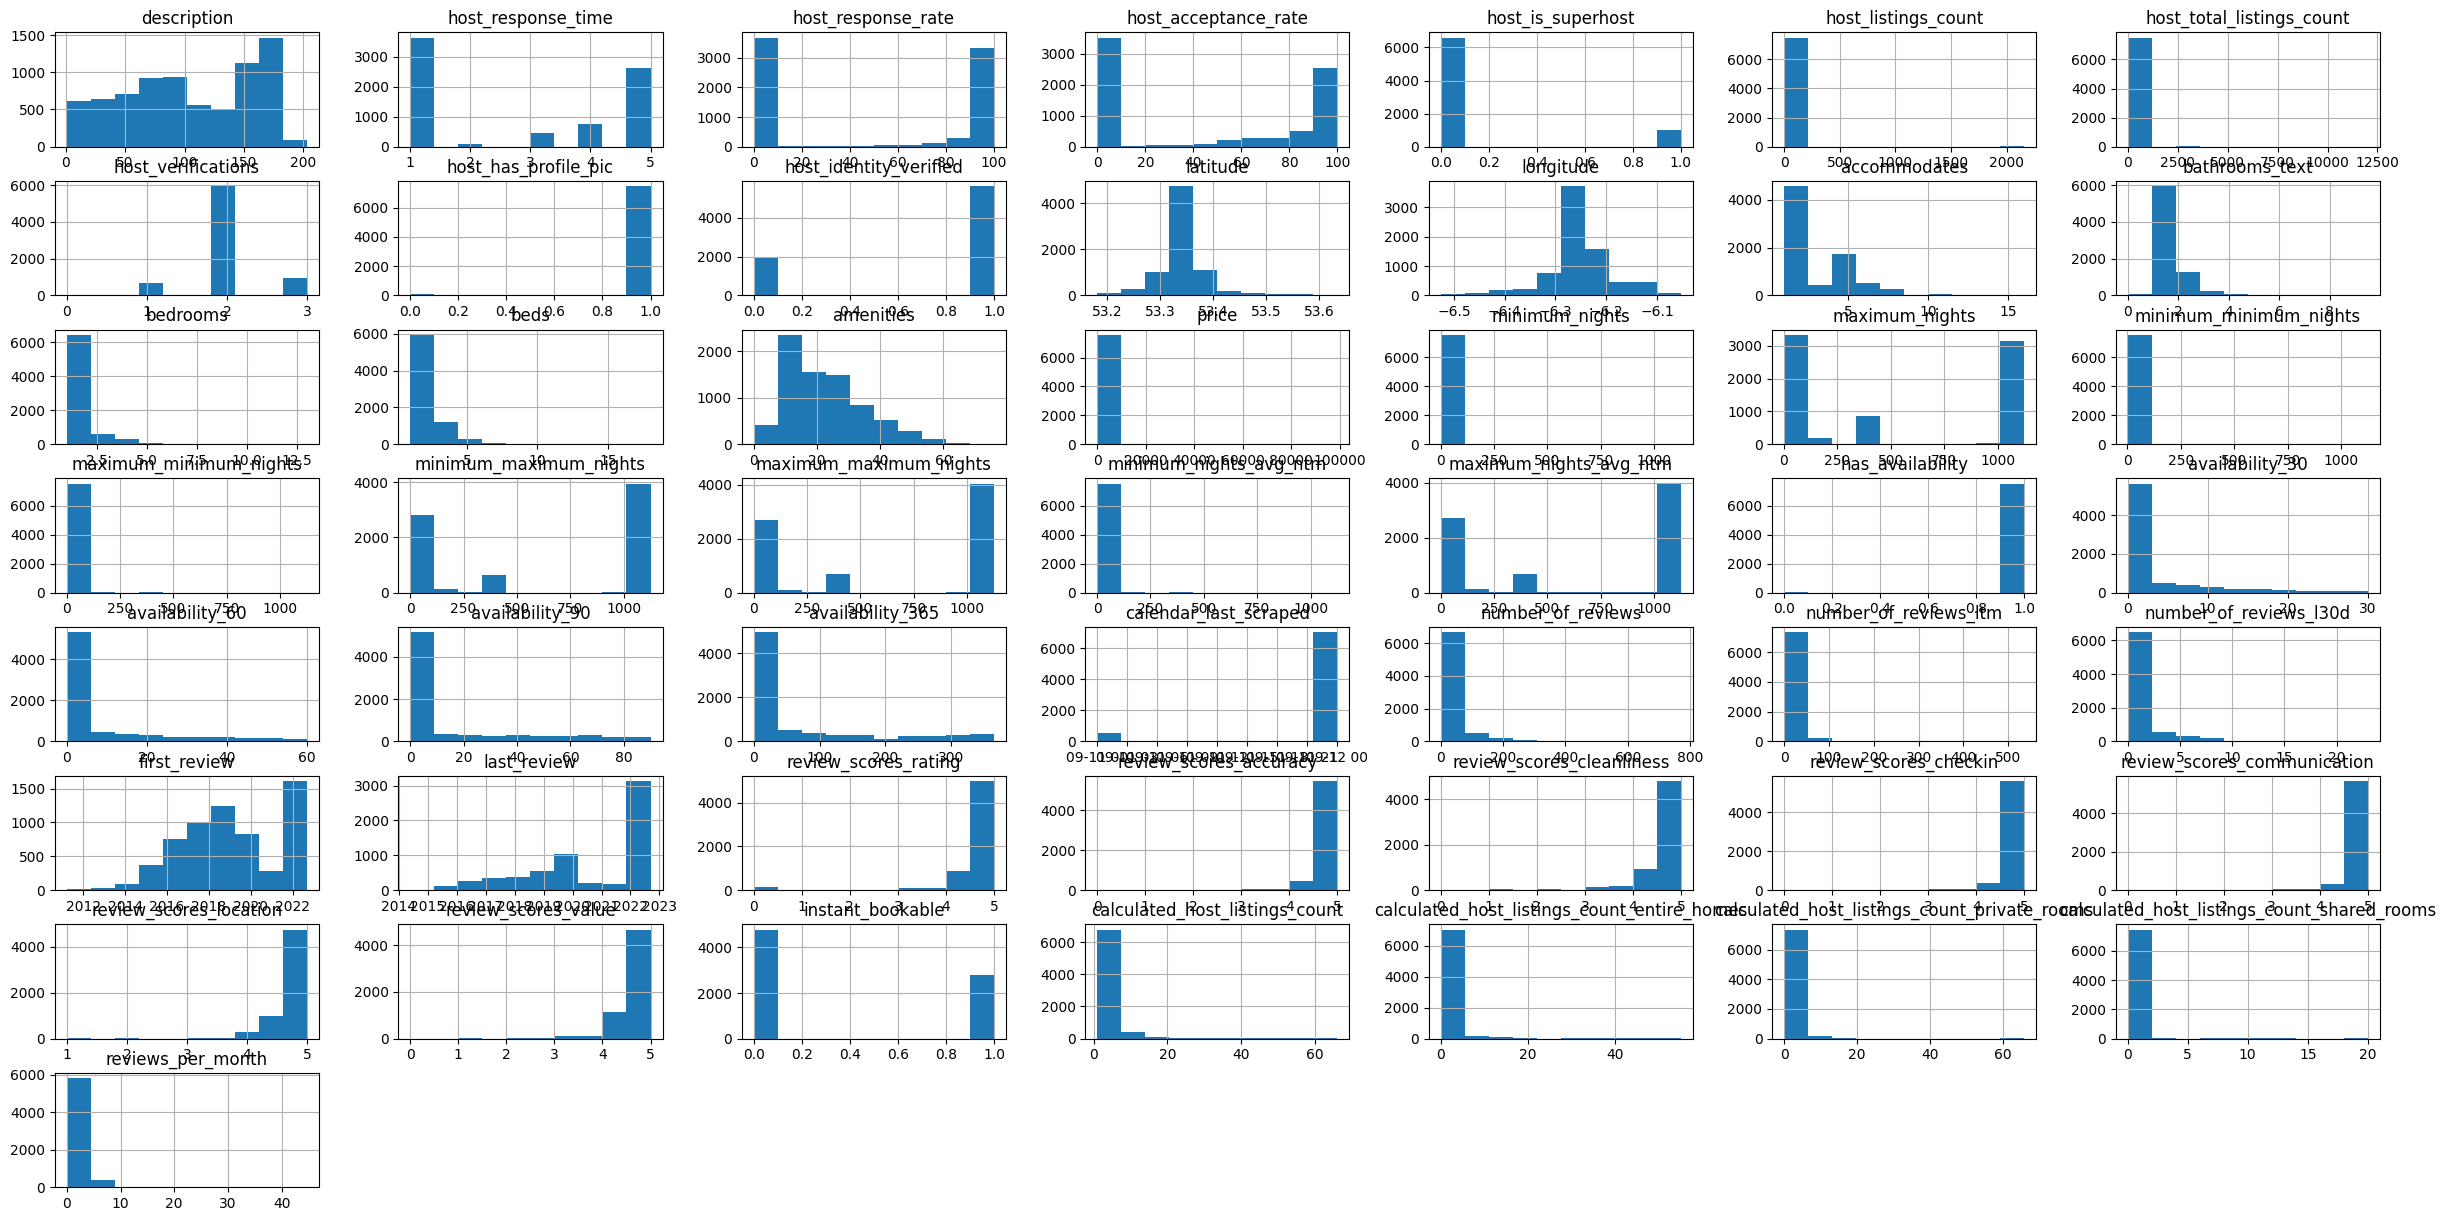

In [761]:
df_numeric = df[df.describe().columns]
df_numeric.drop(columns="id", axis=0 ,inplace=True)
df_numeric.drop(columns="host_id", axis=0 ,inplace=True)

df_numeric.hist(figsize=(30,15))



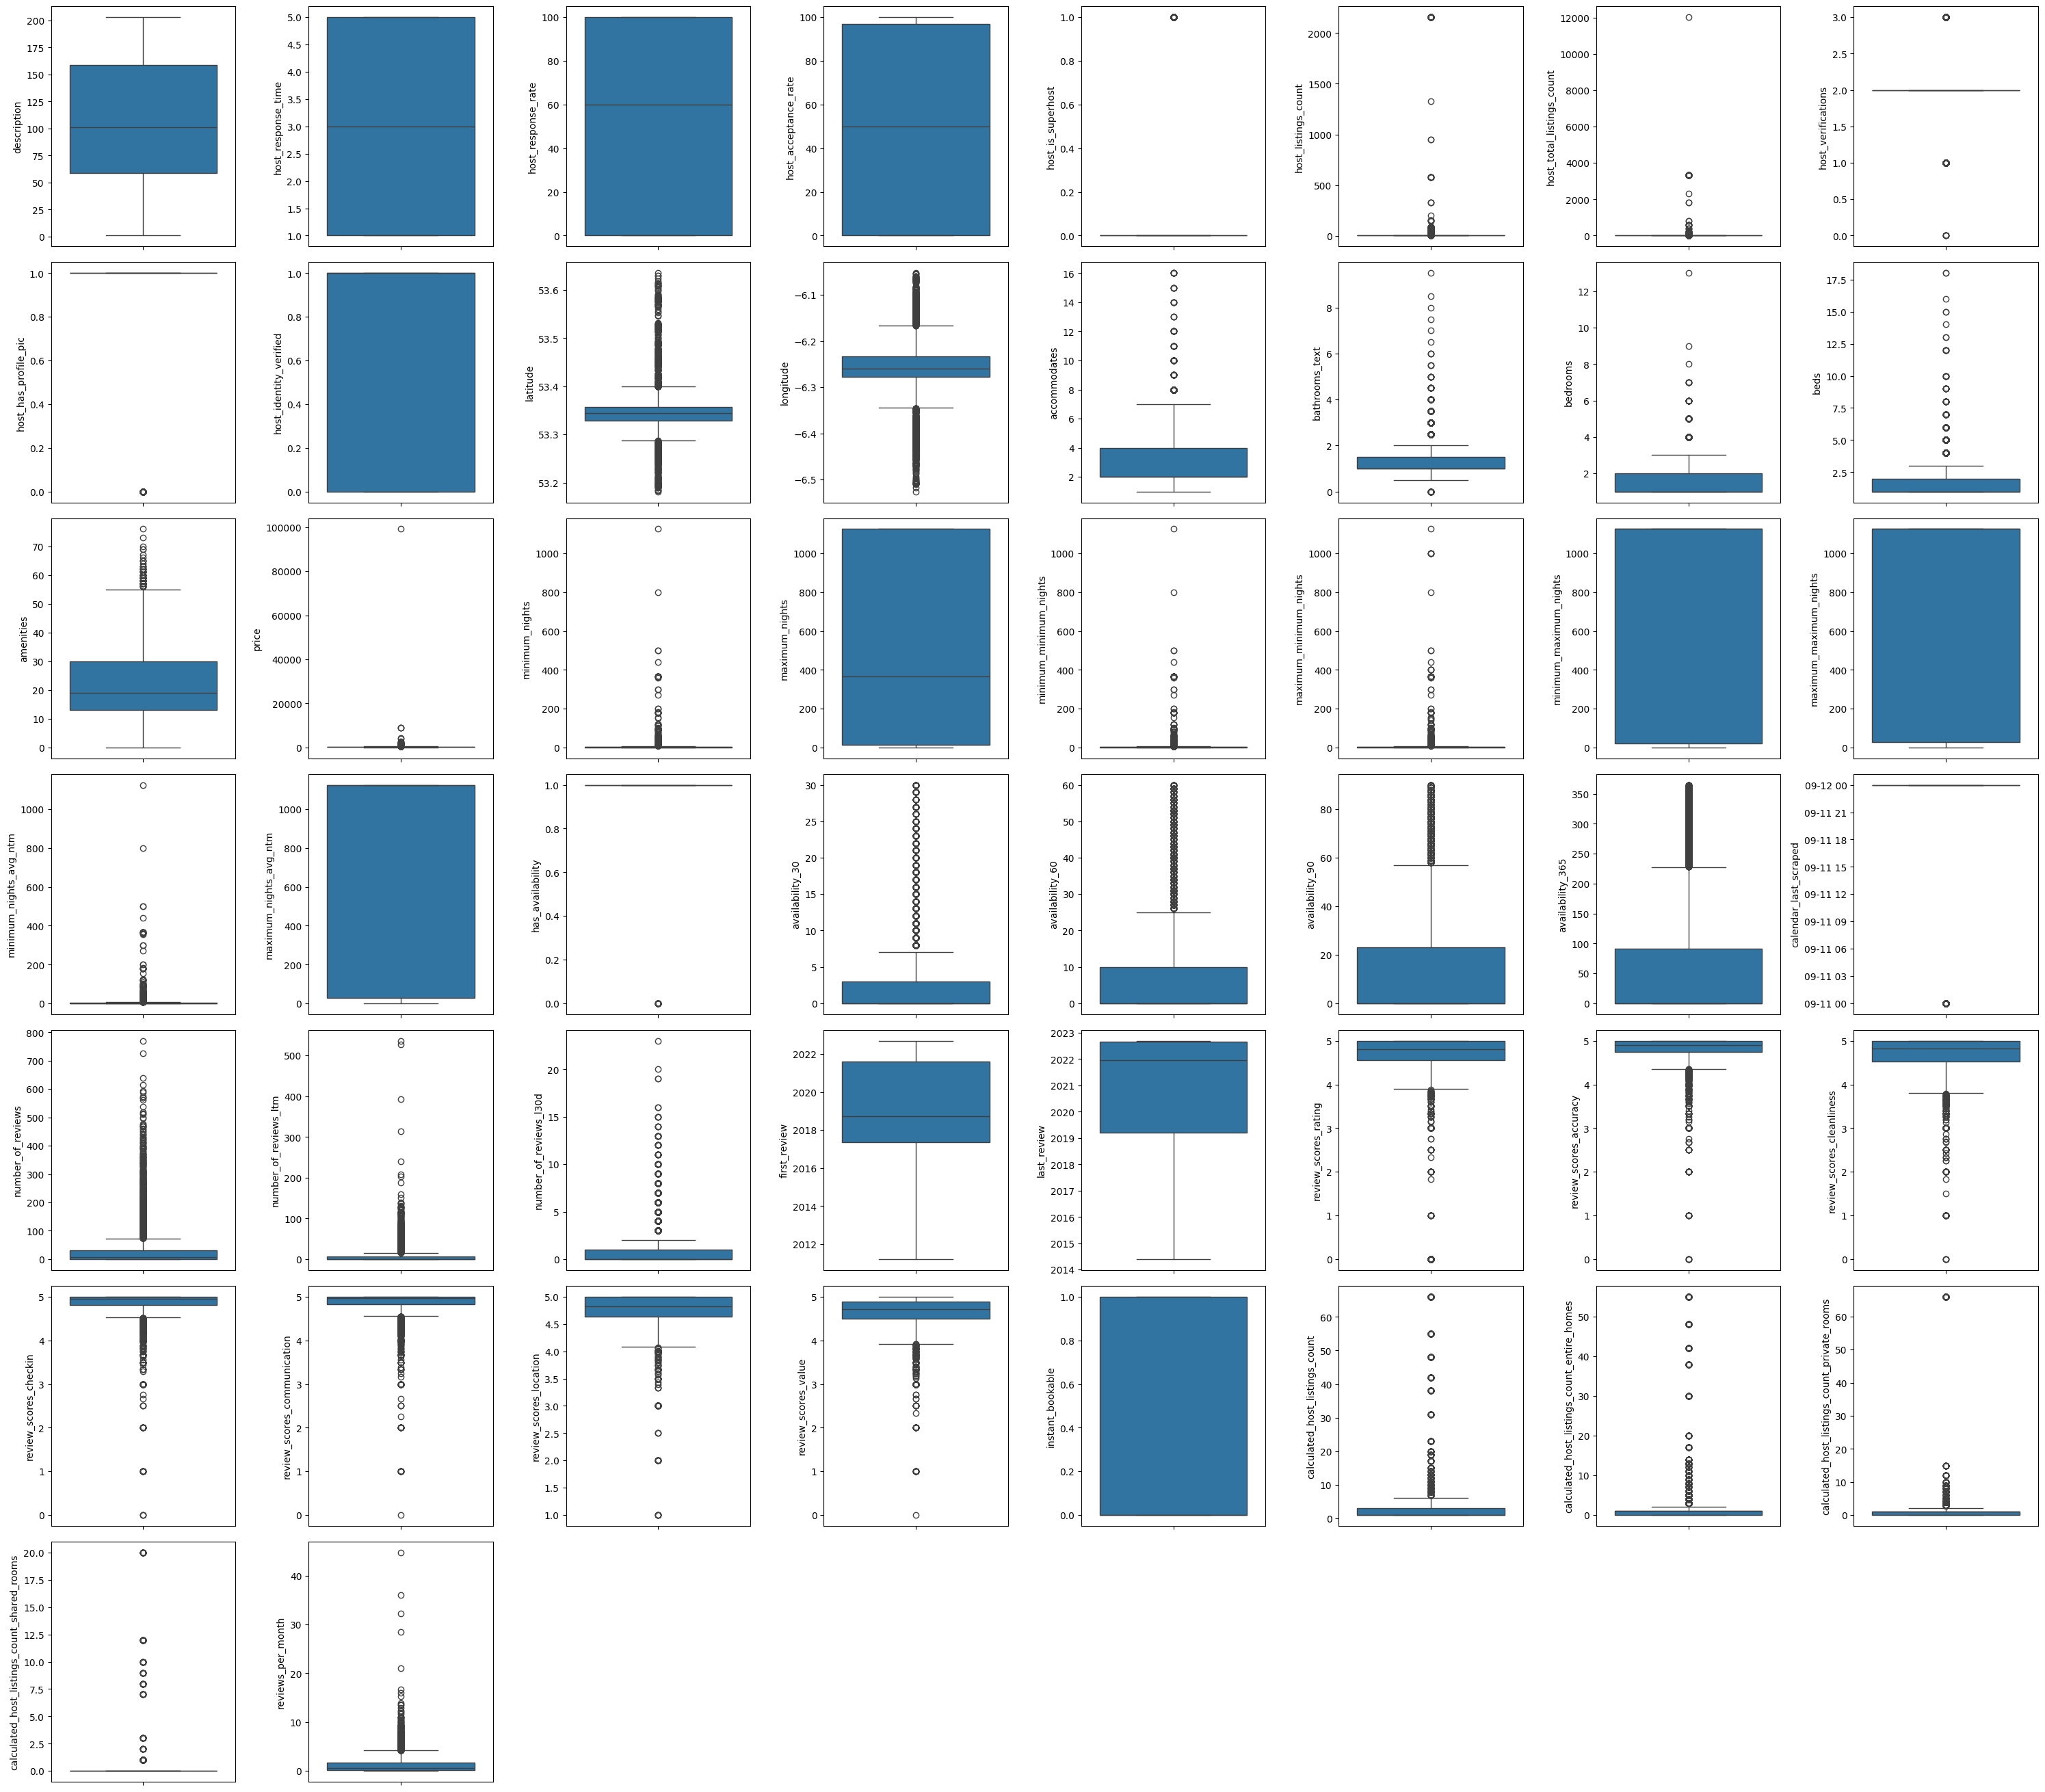

In [762]:
fig = plt.figure(figsize=(30,30))
count = 0
for variable in df_numeric.columns:
    count += 1
    plt.subplot(8, 8, count)
    ax = sns.boxplot(y=variable, data=df_numeric)
plt.tight_layout()  
plt.show()

In [763]:
df.loc[df['price']>1170, 'price'] = np.nan
df['price'].fillna(df['price'].mean(), inplace=True)

df.loc[df['calculated_host_listings_count_private_rooms']>30, 'calculated_host_listings_count_private_rooms'] = np.nan
df['calculated_host_listings_count_private_rooms'].fillna(df['calculated_host_listings_count_private_rooms'].mean(), inplace=True)



df_numeric.loc[df_numeric['price']>1170, 'price'] = np.nan
df_numeric['price'].fillna(df_numeric['price'].mean(), inplace=True)



/var/folders/5h/fvq38v756lxc97gmqyw3df900000gn/T/ipykernel_88722/1326408407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['price'].fillna(df_numeric['price'].mean(), inplace=True)


In [764]:
df_numeric["price"].describe()

count    7566.000000
mean      148.679145
std       133.150795
min        10.000000
25%        65.000000
50%       105.000000
75%       185.000000
max      1133.000000
Name: price, dtype: float64

<Axes: >

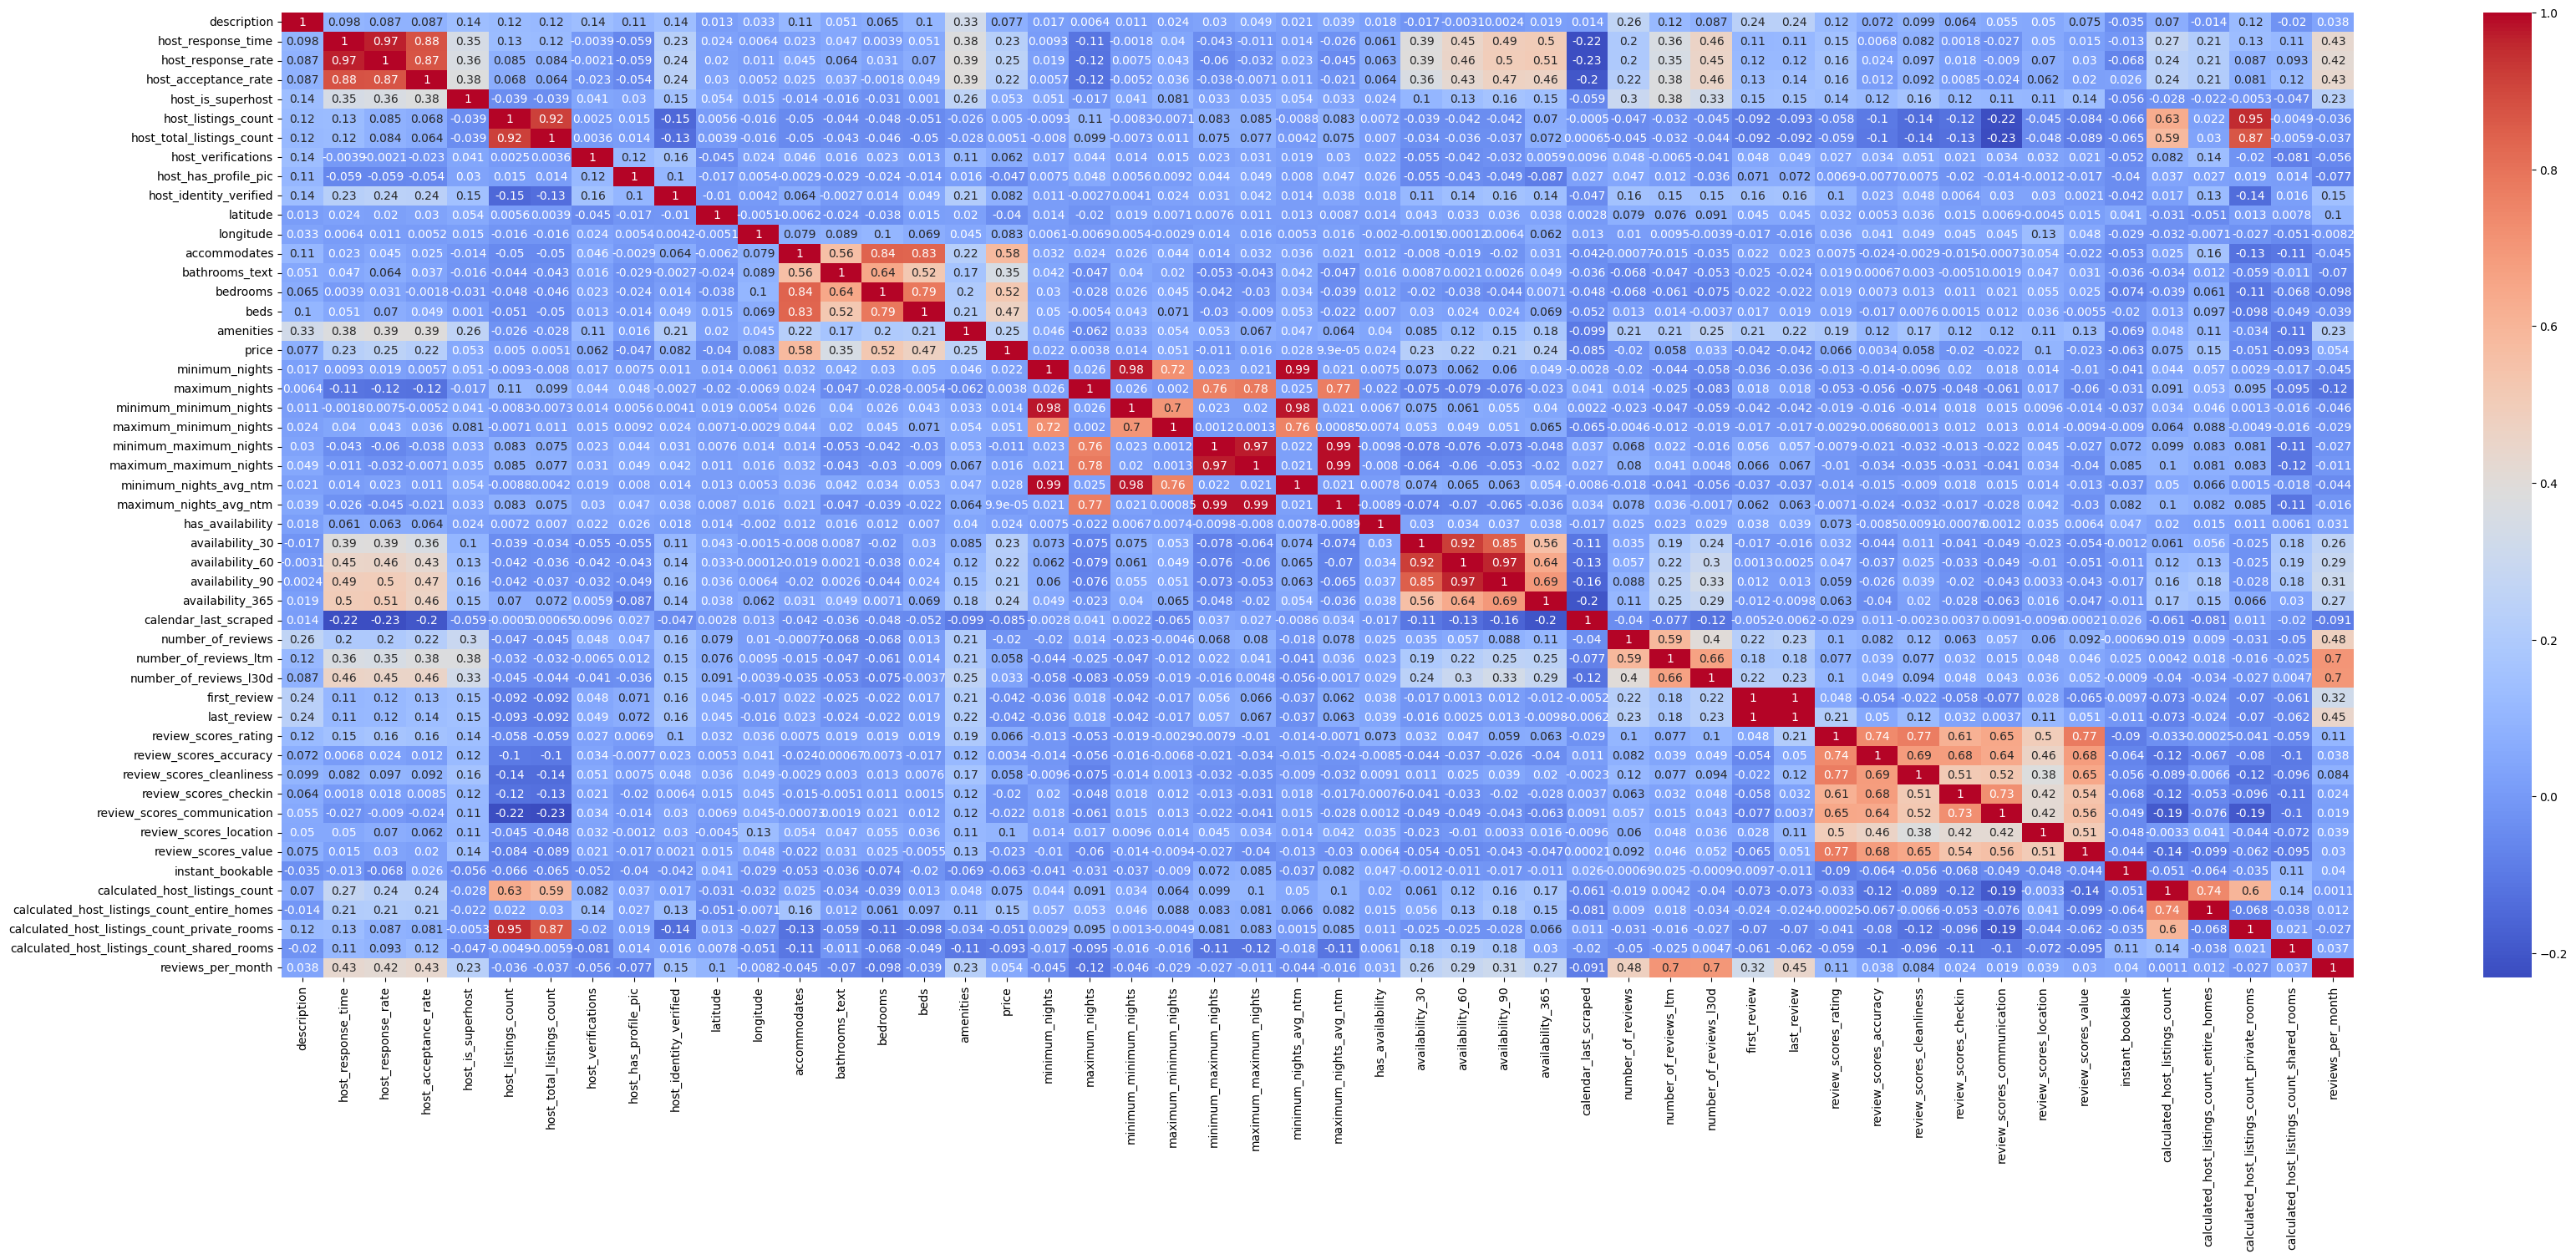

In [765]:
plt.figure(figsize=(40,15))
sns.heatmap(df_numeric.corr(),annot=True ,cmap="coolwarm")

In [766]:
def get_columns_highly_correlated(df_corr, threshold=0.8):     
    upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))      
    to_drop = [column for column in upper.columns if any(abs(upper[column]) > threshold)]
    print(to_drop)    
    return to_drop

['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'last_review', 'calculated_host_listings_count_private_rooms']


<Axes: >

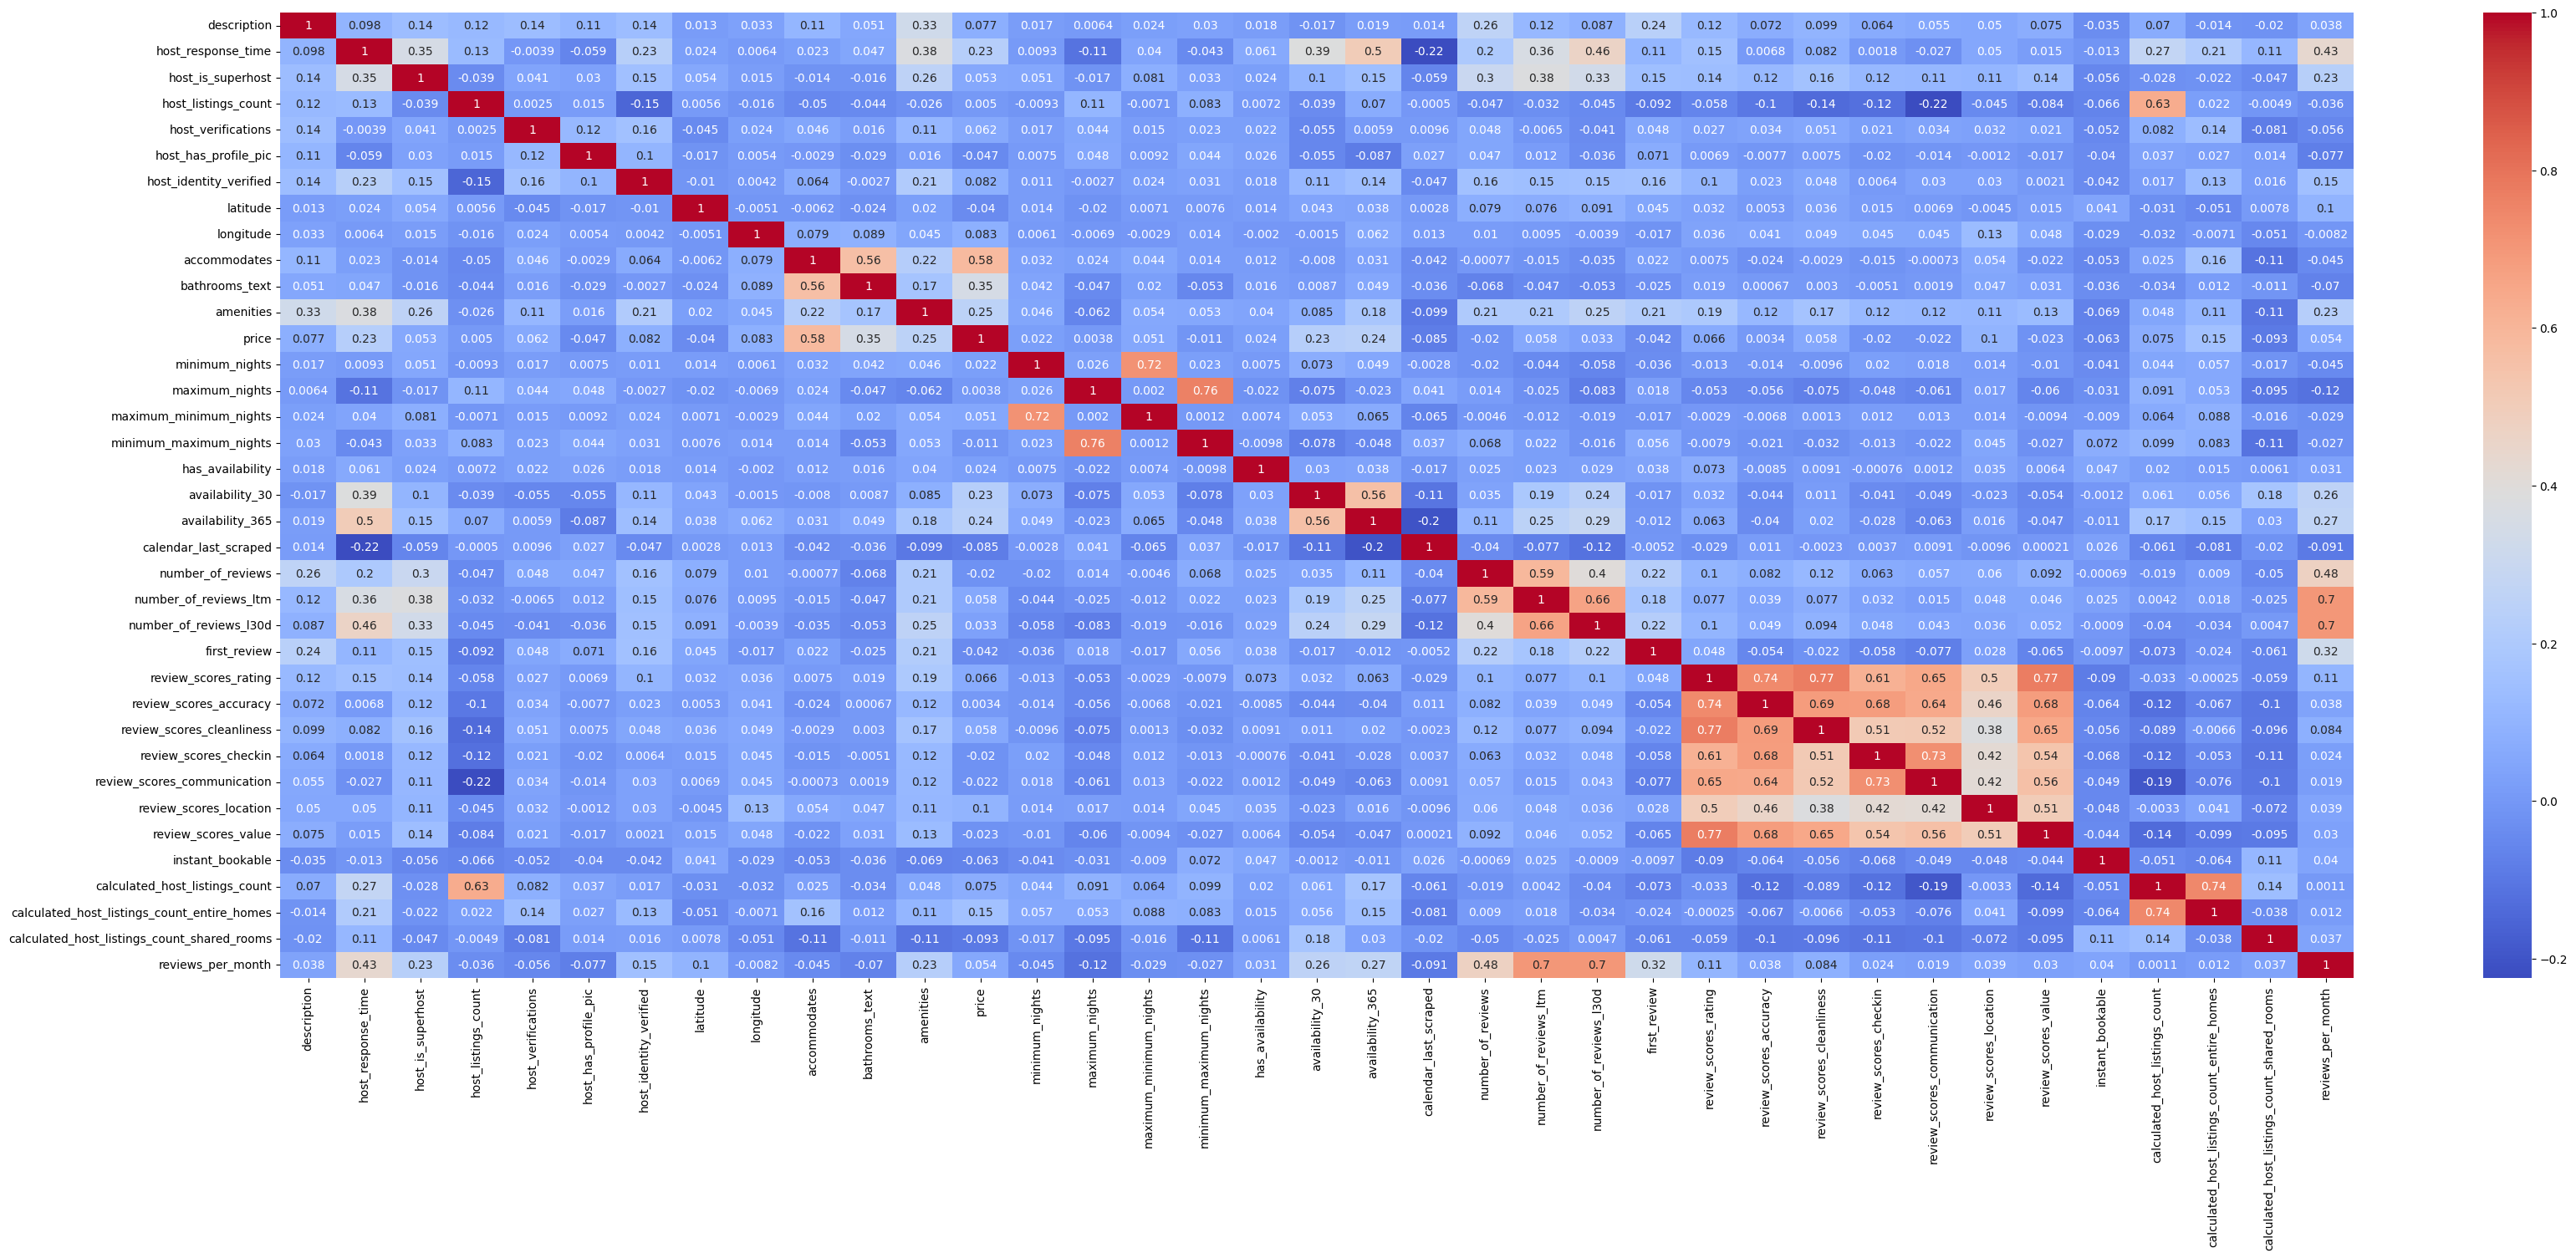

In [767]:
columnsHigh=get_columns_highly_correlated(df_numeric.corr())
filtered =df_numeric.drop(columns=columnsHigh, axis=0)
data_high_correlation = df_numeric[columnsHigh]
plt.figure(figsize=(40,15))
sns.heatmap(filtered.corr(),annot=True ,cmap="coolwarm")

# heatmap of correlation of variables

In [768]:
variableOfInterest = [
     'host_response_time',
    # 'host_is_superhost',
    # 'host_total_listings_count',
    # 'bedrooms',
    # 'beds',
    # 'price',
    # 'minimum_minimum_nights',
    # 'maximum_minimum_nights',
    # 'minimum_maximum_nights',
    # 'maximum_maximum_nights',
    # 'minimum_nights_avg_ntm',
    # 'maximum_nights_avg_ntm',
    # 'availability_60',
    # 'availability_90',
      'availability_365',
      'number_of_reviews_ltm',
    # 'number_of_reviews_l30d',
    # 'review_scores_accuracy',
    # 'review_scores_cleanliness',
    # 'review_scores_checkin',
    # 'review_scores_communication',
    # 'review_scores_value',
    # 'calculated_host_listings_count',
    # 'calculated_host_listings_count_entire_homes',
    # 'calculated_host_listings_count_private_rooms',
      'reviews_per_month'
    ]

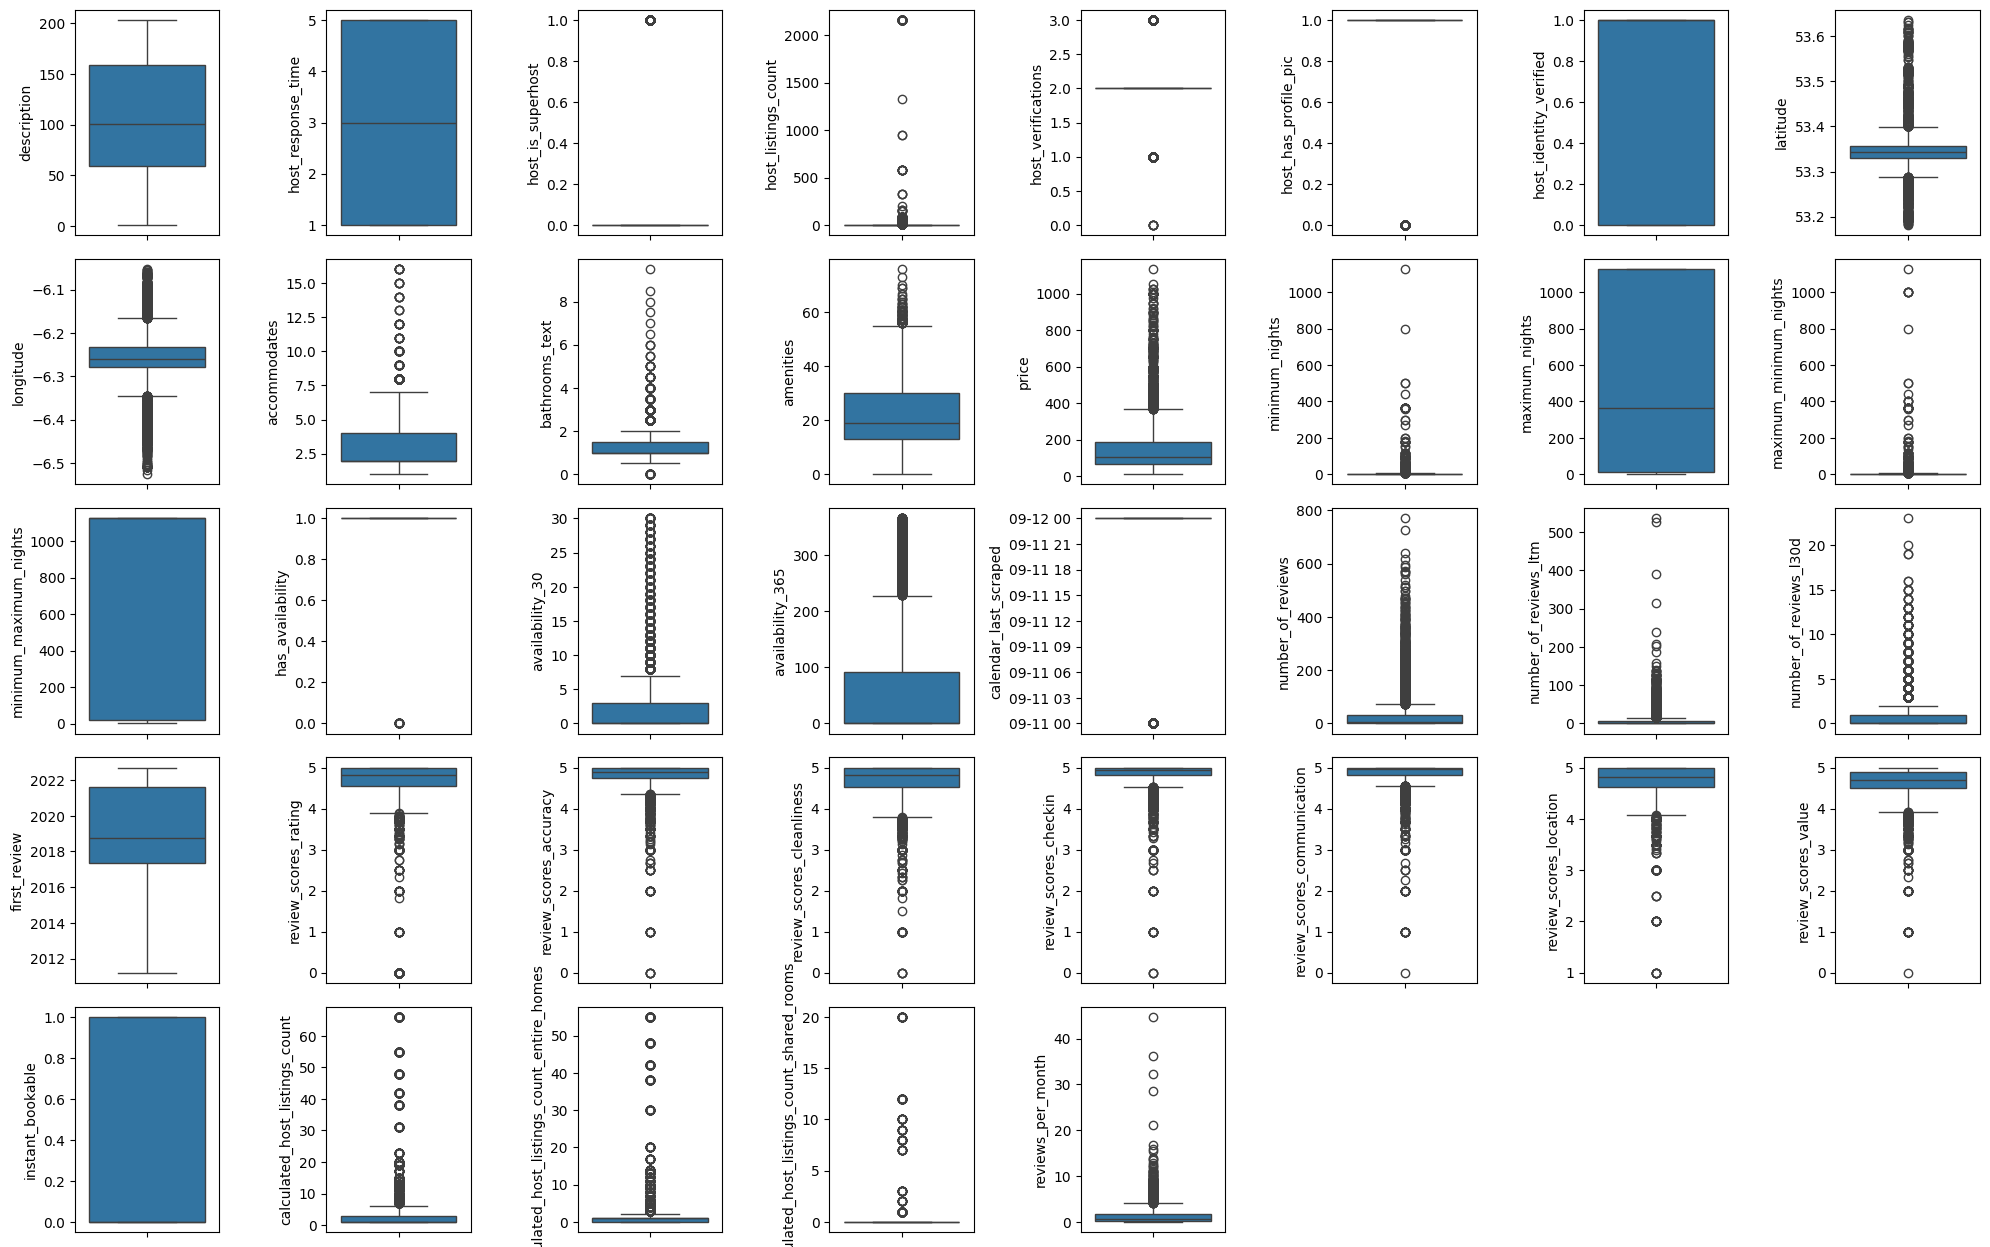

In [770]:
fig = plt.figure(figsize=(20,20))
count = 0
for variable in filtered:
    count += 1
    plt.subplot(8, 8, count)
    ax = sns.boxplot(y=variable, data=df)
plt.tight_layout()  
plt.show()

# Data amputation

In [771]:
df.loc[df['host_total_listings_count']>10, 'host_total_listings_count'] = np.nan
df['host_total_listings_count'].fillna(df['host_total_listings_count'].mean(), inplace=True)

df.loc[df['calculated_host_listings_count']>10, 'calculated_host_listings_count'] = np.nan
df['calculated_host_listings_count'].fillna(df['calculated_host_listings_count'].mean(), inplace=True)

df.loc[df['calculated_host_listings_count_entire_homes']>10, 'calculated_host_listings_count_entire_homes'] = np.nan
df['calculated_host_listings_count_entire_homes'].fillna(df['calculated_host_listings_count_entire_homes'].mean(), inplace=True)

df.loc[df['reviews_per_month']>10, 'reviews_per_month'] = np.nan
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

df.loc[df['number_of_reviews_ltm']>100, 'number_of_reviews_ltm'] = np.nan
df['number_of_reviews_ltm'].fillna(df['number_of_reviews_ltm'].mean(), inplace=True)

In [772]:
df["last_review"].describe()

count                             6209
mean     2020-10-10 17:27:49.254308096
min                2014-05-26 00:00:00
25%                2019-03-18 00:00:00
50%                2021-12-13 00:00:00
75%                2022-08-27 00:00:00
max                2022-09-11 00:00:00
Name: last_review, dtype: object

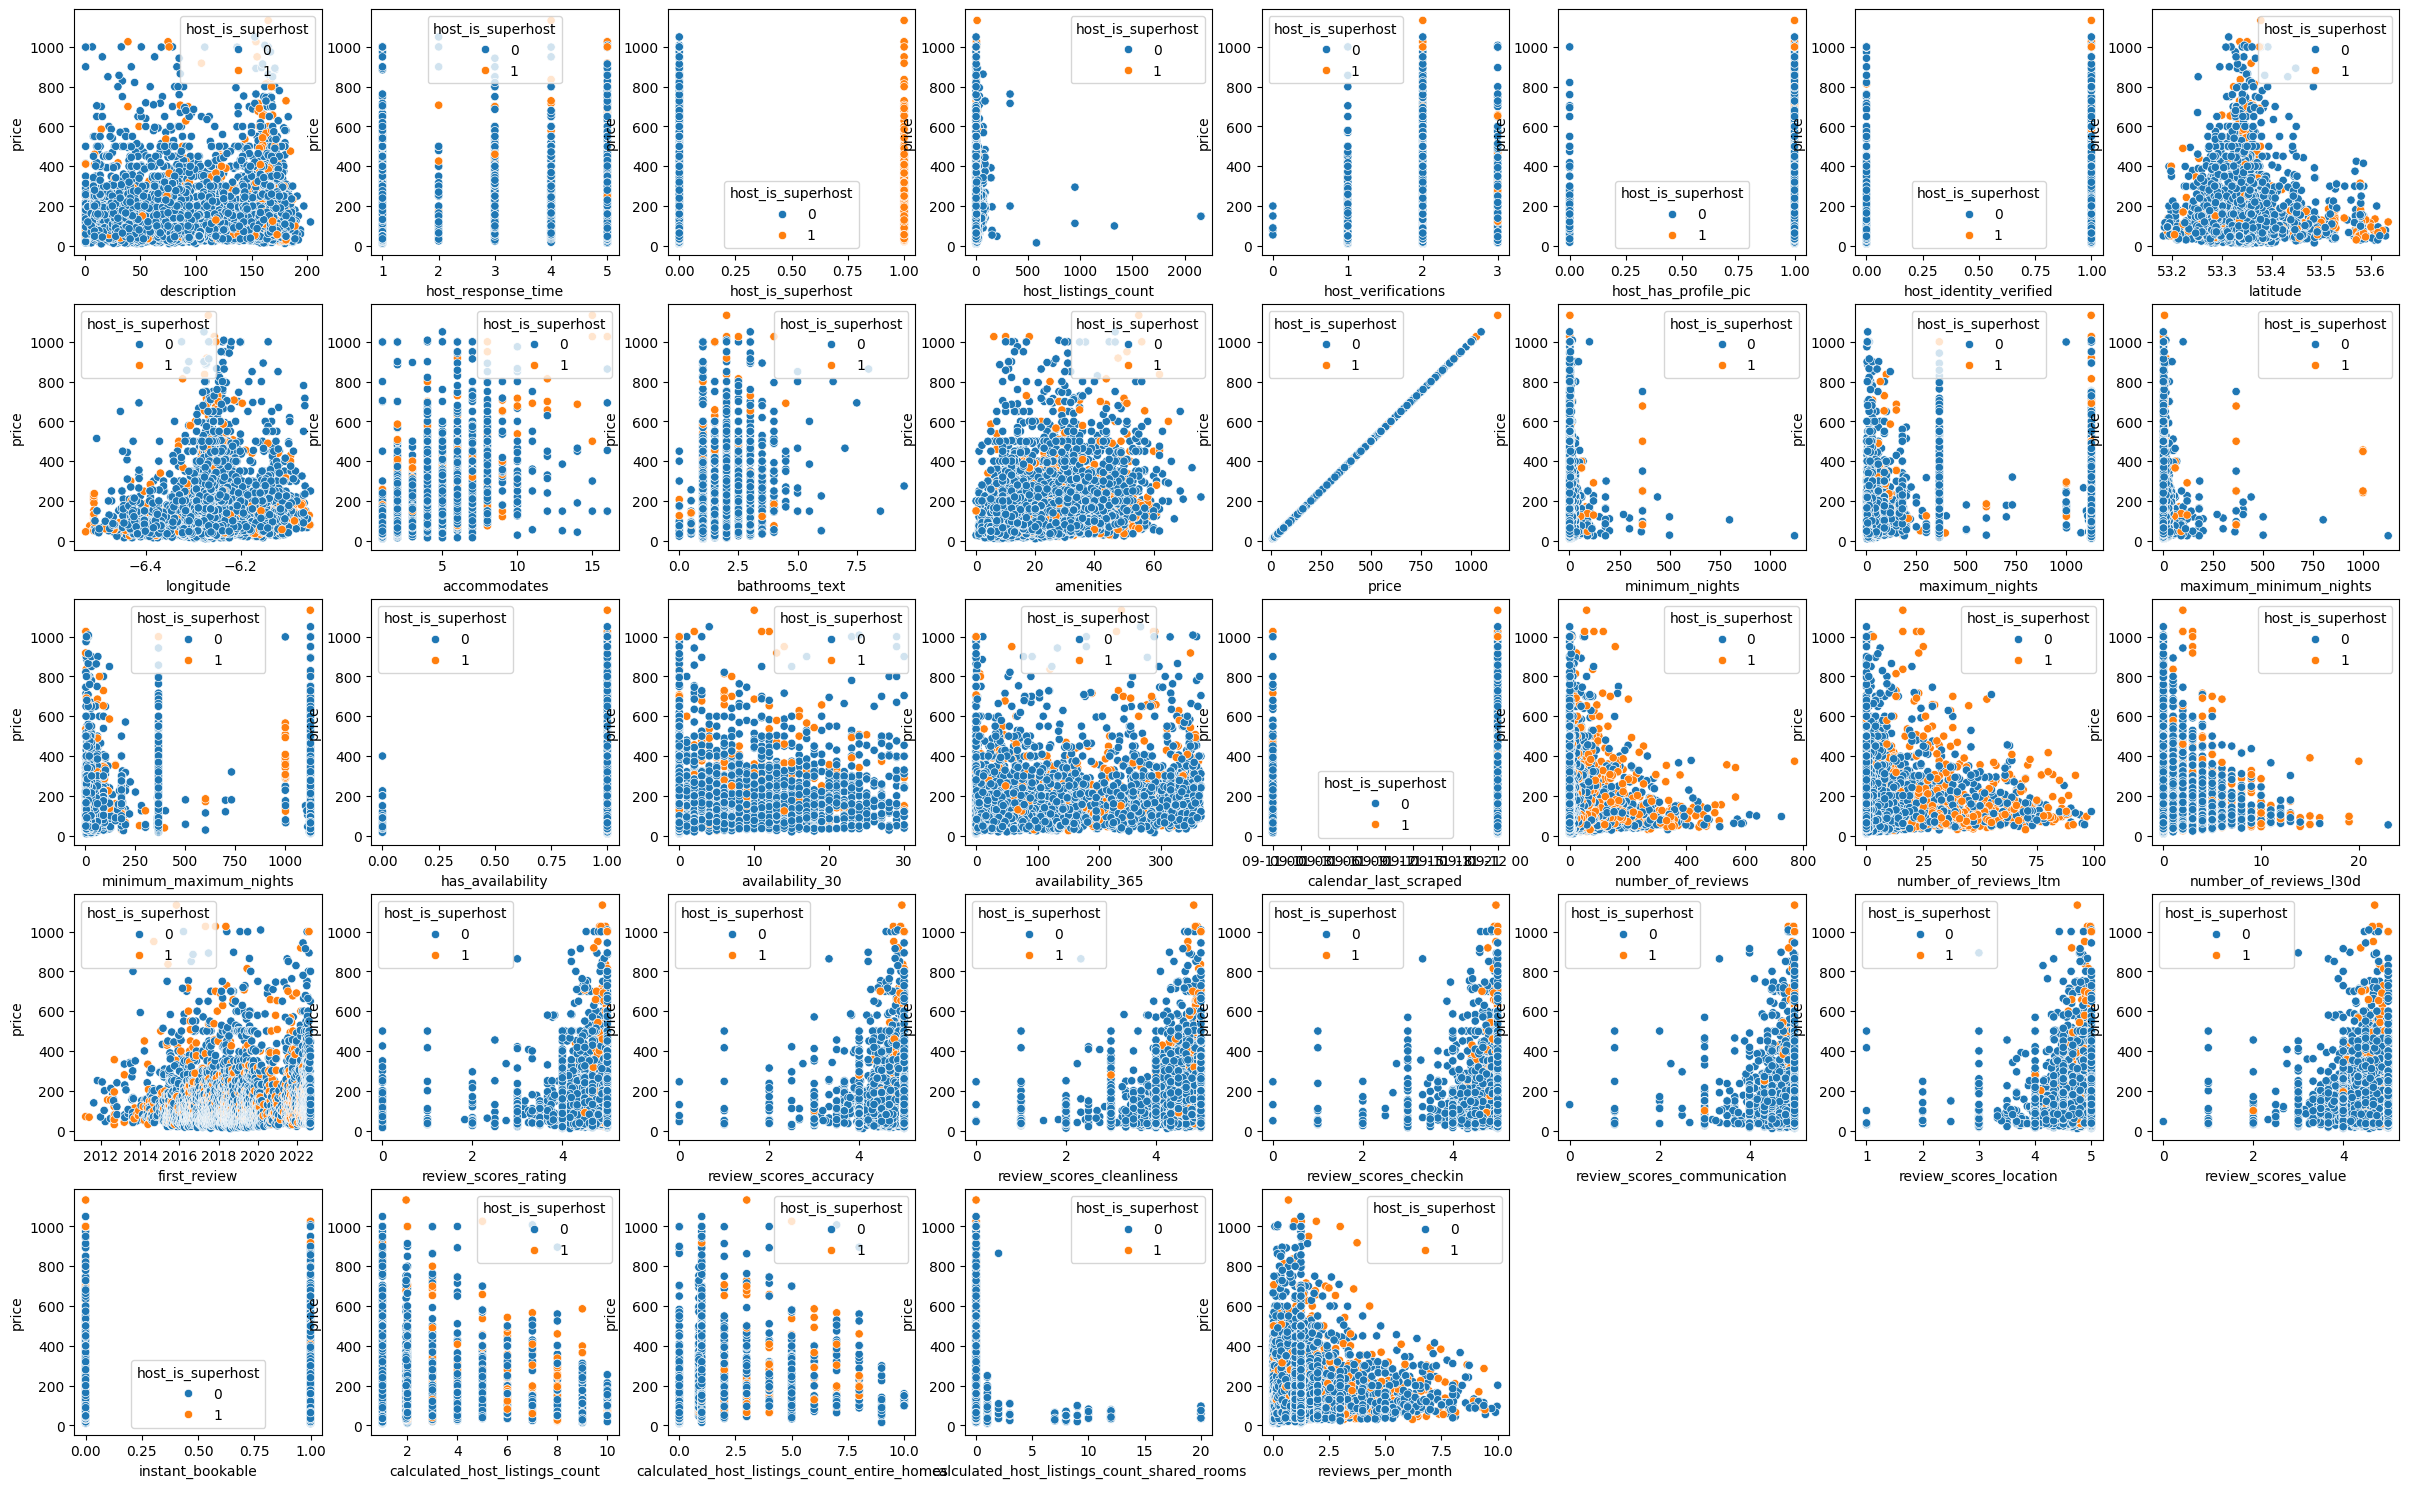

In [773]:
#Visualization of the selected variables using box plots
fig = plt.figure(figsize=(30,30))

count = 0

for variable in filtered:
    
    count += 1
    
    plt.subplot(8, 8, count)
    
    ax = sns.scatterplot(y='price',x = variable, data = df, hue='host_is_superhost')  
    
plt.show()


In [774]:
df.drop(columns="host_about",axis=1,inplace=True)
df.drop(columns="host_location",axis=1,inplace=True)
df.drop(columns="host_neighbourhood",axis=1,inplace=True)
df.drop(columns="neighborhood_overview",axis=1,inplace=True)
df = df.dropna(subset=['review_scores_rating'])
df = df.dropna(subset=['review_scores_value'])
df = df.dropna(subset=['neighbourhood'])
df = df.dropna(subset=['beds'])
df = df.dropna(subset=['bedrooms'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3532 entries, 0 to 7519
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            3532 non-null   int64         
 1   name                                          3532 non-null   object        
 2   description                                   3532 non-null   int64         
 3   host_id                                       3532 non-null   int64         
 4   host_name                                     3532 non-null   object        
 5   host_since                                    3532 non-null   object        
 6   host_response_time                            3532 non-null   int64         
 7   host_response_rate                            3532 non-null   int64         
 8   host_acceptance_rate                          3532 non-null   int64      

In [775]:
df = df[df['host_acceptance_rate'] != 0]

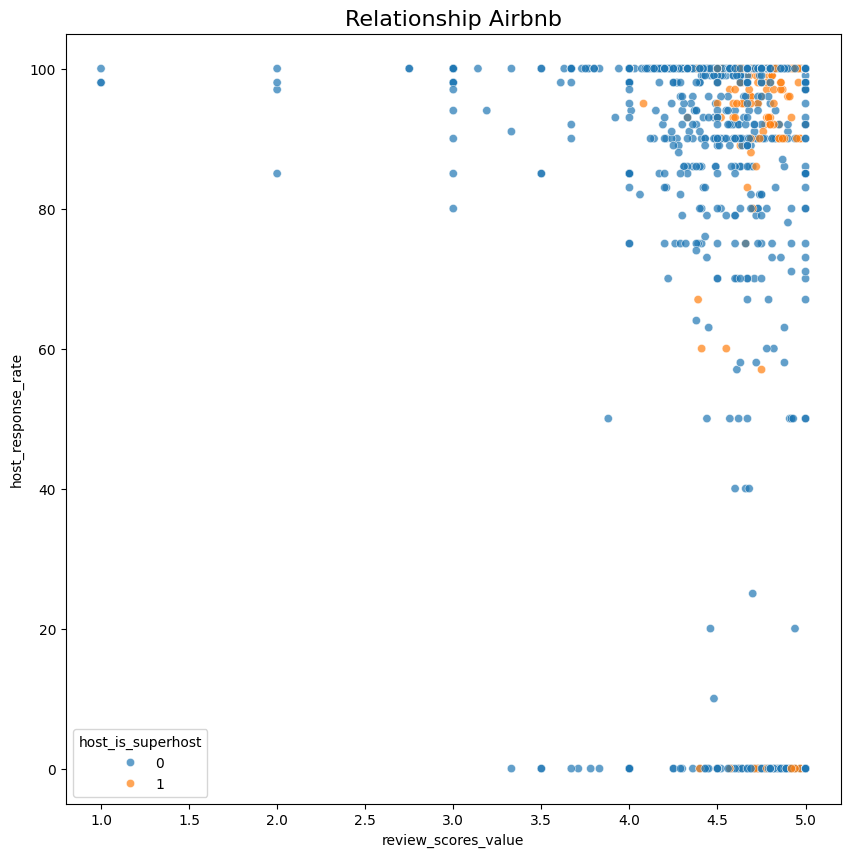

In [787]:
MyPalette = {1: 'yellow', 2: 'magenta',3:'green',4:'blue',5:'red'}
plt.figure(figsize=(10, 10))
#sns.scatterplot(x='review_scores_rating', y='number_of_reviews_l30d', hue='host_is_superhost', data=df, alpha=0.7, palette="magma")
sns.scatterplot(x='review_scores_value', y='host_response_rate', hue='host_is_superhost', data=df, alpha=0.7)
plt.title('Relationship Airbnb', fontsize=16)
plt.show()

/var/folders/5h/fvq38v756lxc97gmqyw3df900000gn/T/ipykernel_88722/2709958395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df[['bedrooms', 'price']],palette="pastel")


<Axes: xlabel='bedrooms', ylabel='price'>

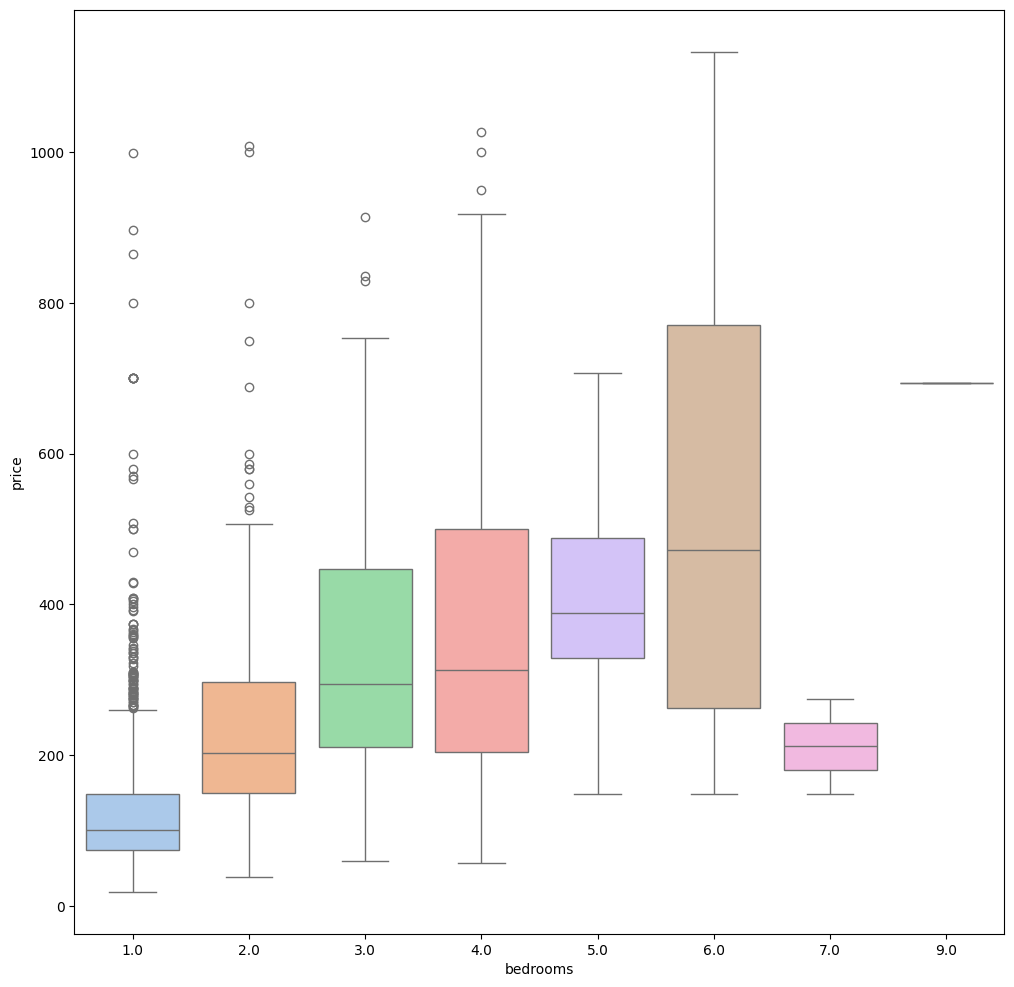

In [778]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sns.boxplot(x='bedrooms', y='price', data=df[['bedrooms', 'price']],palette="pastel")

# The graph shows the relationship between the number of bedrooms in an Airbnb rental and its price. The horizontal axis shows the number of bedrooms, from 1 to 9. The vertical axis shows the price, in euros.

The graph shows that, in general, Airbnb rentals with more bedrooms are more expensive. Airbnb rentals with one bedroom have an average price of €200, while Airbnb rentals with four bedrooms have an average price of €800.

There are some exceptions to this trend. For example, Airbnb rentals with two bedrooms may have a price similar to Airbnb rentals with three bedrooms. This may be due to factors such as location, the size of the rental, or the quality of the construction.

It can also be observed that the price of Airbnb rentals with more than five bedrooms is more variable. This may be due to the fact that these rentals are less common, and therefore it is more difficult to find comparable data.

In general, the graph shows that the number of bedrooms is an important factor to consider when pricing an Airbnb rental. Airbnb rentals with more bedrooms are typically more expensive, but they also offer more space and comfort.

<Axes: xlabel='neighbourhood_cleansed', ylabel='price'>

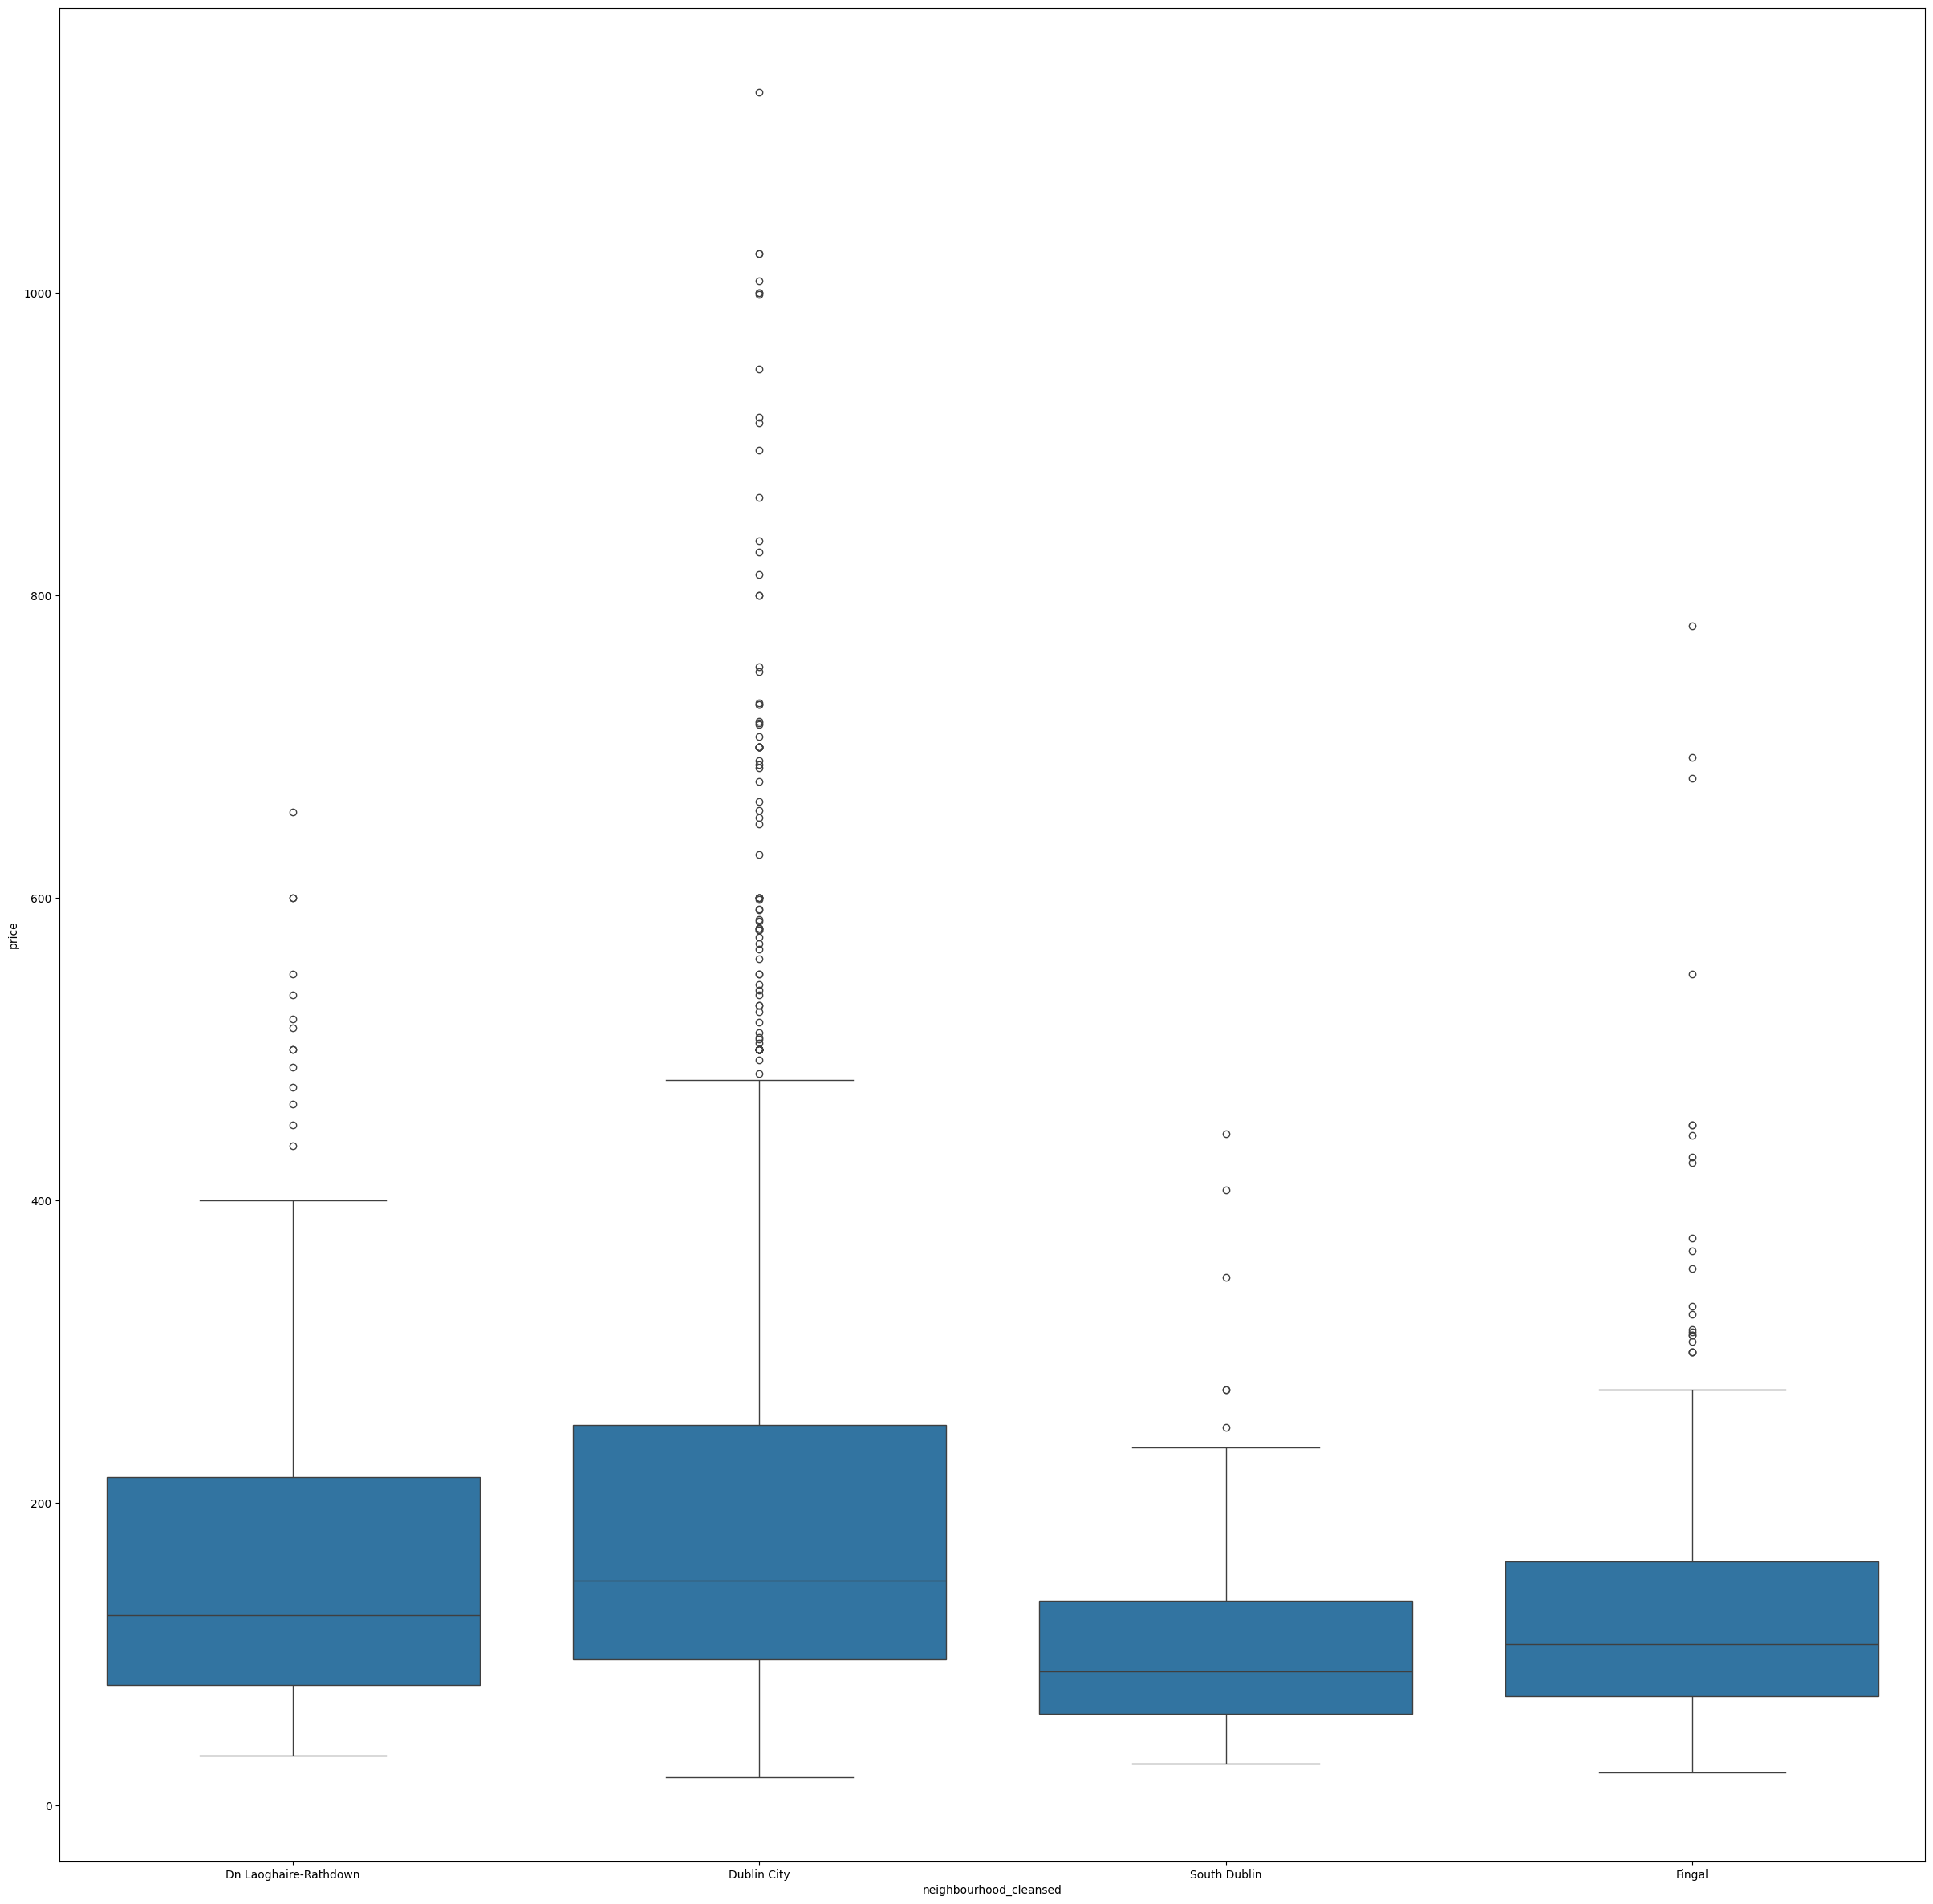

In [779]:
plt.figure(figsize=(30, 30))
sns.boxplot(x="neighbourhood_cleansed", y="price", data=df)

this is the average price. The horizontal axis shows the neighborhood, and the vertical axis shows the average price, in euros.

The graph shows that the most expensive neighborhoods for Airbnb rentals in Dublin are Dún Laoghaire-Rathdown, Dublin City, and South Dublin. These neighborhoods are all located in the city center or near major transportation hubs.

Dún Laoghaire-Rathdown has the most expensive Airbnb rentals, with an average price of over €300 per night. This neighborhood is located south of Dublin City and is known for its beaches, restaurants, and shops.

Dublin City has an average price of over €250 per night. This neighborhood is the center of Dublin and is home to many popular tourist attractions, such as Trinity College and the Guinness Storehouse.

South Dublin has an average price of over €200 per night. This neighborhood is located south of Dublin City and is known for its parks, green spaces, and family-friendly atmosphere.

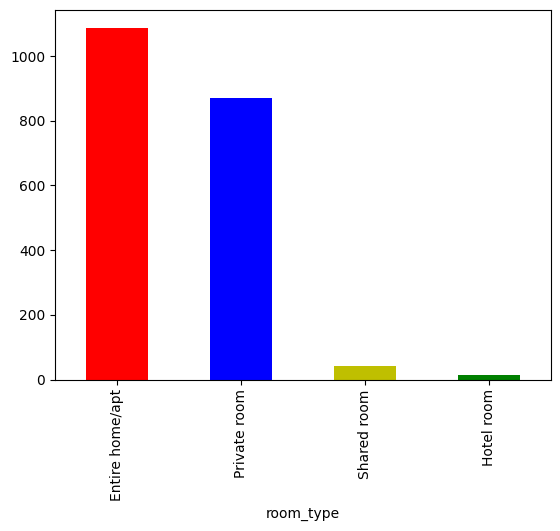

In [780]:
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y','g'])
plt.show()

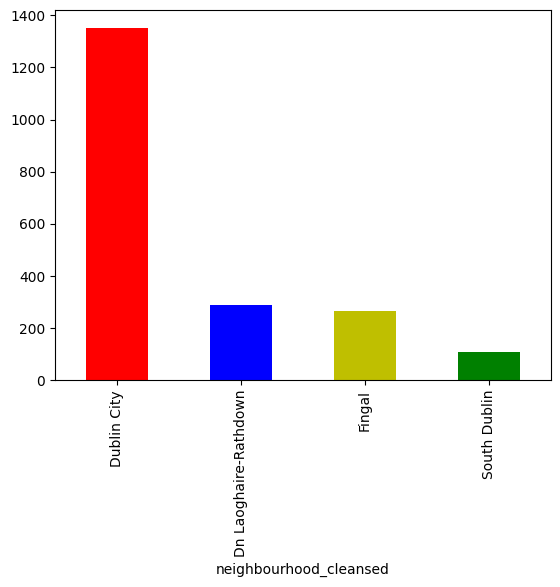

In [781]:
df['neighbourhood_cleansed'].value_counts().plot(kind='bar',color=['r','b','y','g'])
plt.show()

In [782]:
import folium
from folium.plugins import MarkerCluster

columnsMarkers = ["longitude","latitude","price"]

markers=df[columnsMarkers]

# Dublin
dublin_coords = (53.349805, -6.26031)

# Center Dublin
m = folium.Map(location=dublin_coords, zoom_start=13)

# Add Markers
marker_cluster = MarkerCluster().add_to(m)

for index, row in markers.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['price']).add_to(marker_cluster)

m


In [783]:
import folium
from folium.plugins import HeatMap
import pandas as pd

map_center = [df['latitude'].mean(), df['longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=10)

heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(my_map)

my_map


# HeatMap for prices located in Dublin, more red more expensive

<Axes: xlabel='host_is_superhost', ylabel='amenities'>

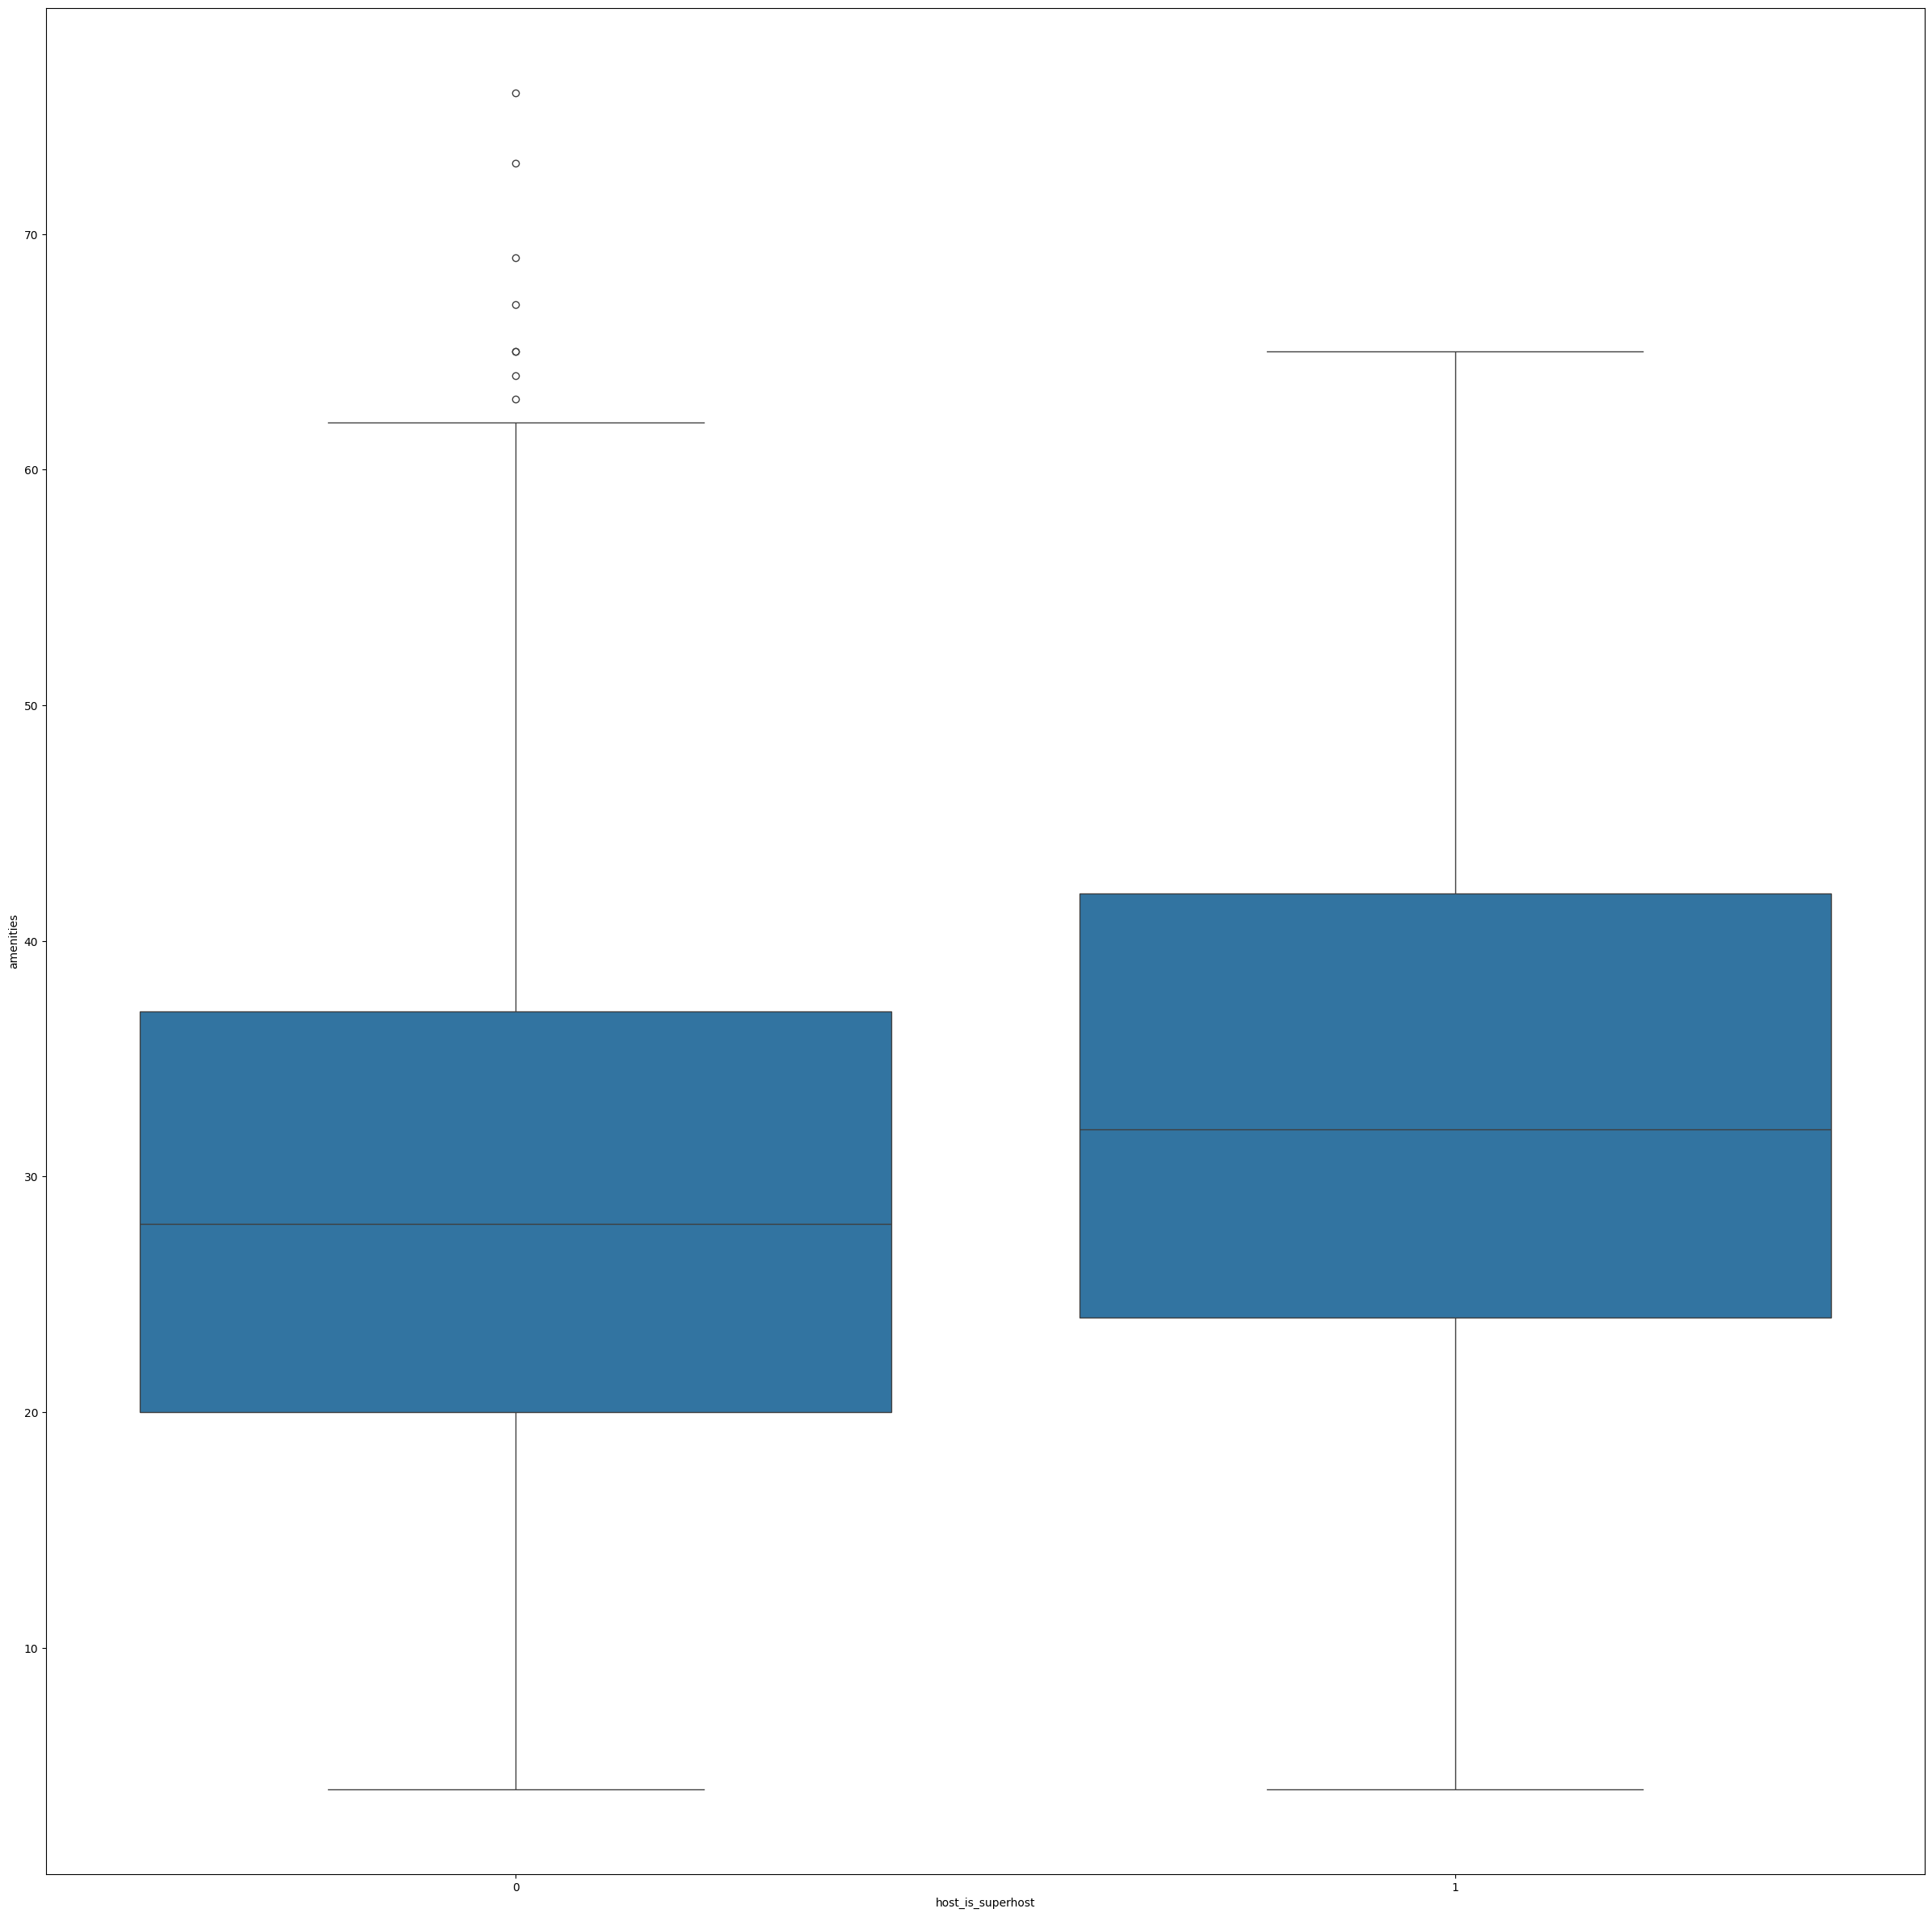

In [784]:
plt.figure(figsize=(30, 30))
sns.boxplot(x="host_is_superhost", y="amenities", data=df)

# The boxplot shows that there is a positive correlation between the number of amenities in an Airbnb listing and whether the host is a Superhost. Superhost rentals tend to have more amenities than non-Superhost rentals. This is likely because Superhost status is awarded to hosts who consistently provide excellent customer service and maintain high-quality listings.

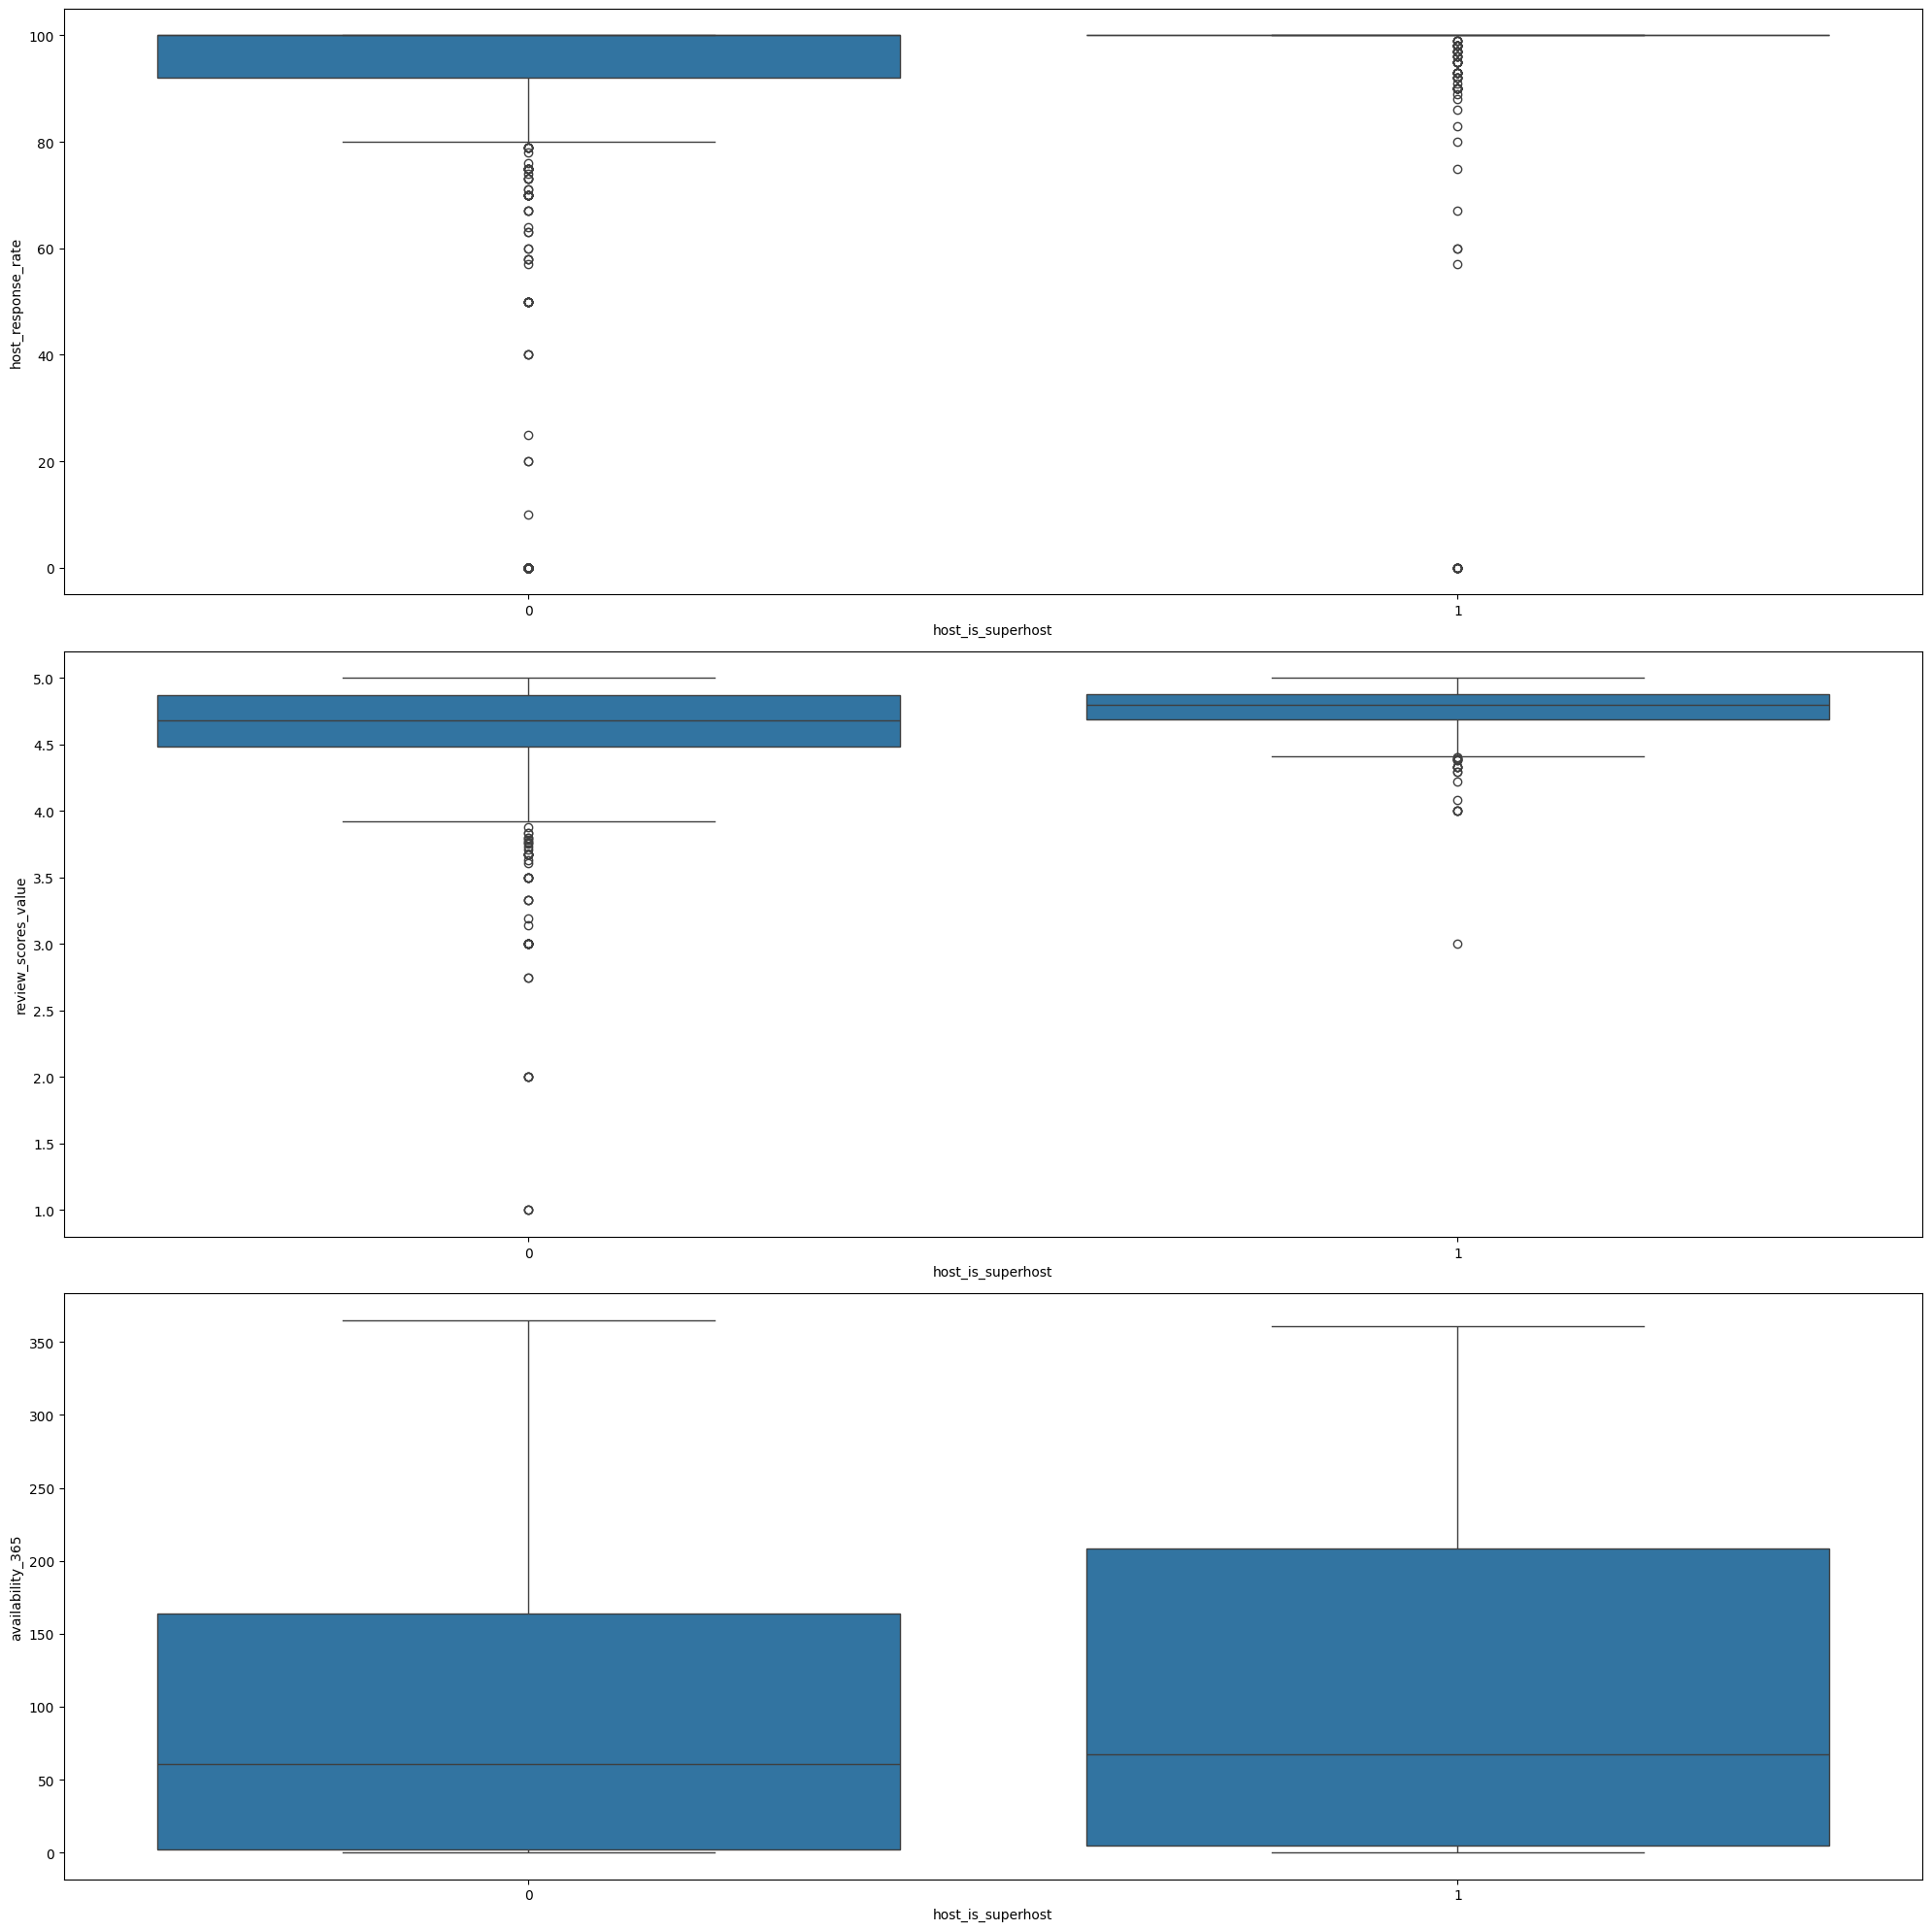

In [788]:
filtered = [
    'host_response_rate',
    'review_scores_value',
     'availability_365'
]

# Eliminar filas con valores nulos en las columnas seleccionadas
df_filtered = df[filtered + ['host_is_superhost']].dropna()

fig = plt.figure(figsize=(20, 20))
count = 0

for variable in filtered:
    count += 1
    plt.subplot(len(filtered), 1, count)
    ax = sns.boxplot(x='host_is_superhost', y=variable, data=df_filtered)

plt.tight_layout()
plt.show()

The boxplot shows that, in general, hosts with a higher response rate are more likely to be Superhosts. 25% of hosts with a 90% or higher response rate are Superhosts, while only 10% of hosts with a 70% or lower response rate are Superhosts.

This is because hosts with a higher response rate are more likely to be seen as high-quality hosts by guests. Guests are more satisfied with hosts who respond quickly to their inquiries, which makes it more likely that they will book with them again.
